## 1. Background and research motivation<br>

Financial sector has always became my lucrative sector to research on. As we are slowly reviving from the tough economic conditions from COVID-19, there has been mild increment in credit utilization comparing to 2020. The credit usage has dropped to 25%(compared to 29% in 2019. As pandemic has forced to rethink the financial portfolio of each and every Americans, financial institutions are also finding a better approach to target services to different customer clusters. Understanding the challenge of credit market, once reticent financial institution are launching new marketing campaign and promotions in the face of recession.  

On this background, the goal of this project is to identifying and evaluation of  the credit card holder's clusters which assists business by providing better understanding of cluster characteristics and finding better and more personalise approach to target services to them. So, on this behalf, we can simplify the problem which we are trying to deal with here.

A credit card company has provided data which has been collected over years. The data is mainly about the customer characteristics and other various related factors. Now, we have to use the data to make some meaningful clustering to get insight and devise marketing strategies to target customers for positive revenue in return by the financial institution. 


## 2. Importing libraries and data frame

In [220]:
#importing libraries

import numpy as np
import pandas as pd 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import umap
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics
from sklearn.metrics import silhouette_score
import missingno as msno
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [164]:
df = pd.read_csv('CC GENERAL.csv')

## 3. Data description and initial inspection

The sample Data summarizes the usage behavior of 8950 credit card holders. Data consists of 18 features accomodating six months of credit card usage.
Data Source
https://www.kaggle.com/arjunbhasin2013/ccdata

**Following is the Data Dictionary for Credit Card dataset :-**

<strong>CUSTID</strong> : Identification of Credit Card holder (Categorical)<br>
<strong>BALANCE</strong> : Balance amount left in their account to make purchases<br>
<strong>BALANCEFREQUENCY</strong> : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
<strong>PURCHASES</strong> : Amount of purchases made from account<br>
<strong>ONEOFFPURCHASES</strong> : Maximum purchase amount done in one-go<br>
<strong>INSTALLMENTSPURCHASES</strong> : Amount of purchase done in installment<br>
<strong>CASHADVANCE</strong> : Cash in advance given by the user<br>
<strong>PURCHASESFREQUENCY</strong> : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
<strong>ONEOFFPURCHASESFREQUENCY</strong> : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
<strong>PURCHASESINSTALLMENTSFREQUENCY</strong> : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
<strong>CASHADVANCEFREQUENCY</strong> : How frequently the cash in advance being paid<br>
<strong>CASHADVANCETRX</strong> : Number of Transactions made with "Cash in Advanced"<br>
<strong>PURCHASESTRX</strong> : Numbe of purchase transactions made<br>
<strong>CREDITLIMIT</strong> : Limit of Credit Card for user<br>
<strong>PAYMENTS</strong> : Amount of Payment done by user<br>
<strong>MINIMUM_PAYMENTS</strong> : Minimum amount of payments made by user<br>
<strong>PRCFULLPAYMENT</strong> : Percent of full payment paid by user<br>
<strong>TENURE</strong> : Tenure of credit card service for user<br>

In [5]:
df.head().T

0            1            2  \
CUST_ID                               C10001       C10002       C10003   
BALANCE                            40.900749  3202.467416  2495.148862   
BALANCE_FREQUENCY                   0.818182     0.909091          1.0   
PURCHASES                               95.4          0.0       773.17   
ONEOFF_PURCHASES                         0.0          0.0       773.17   
INSTALLMENTS_PURCHASES                  95.4          0.0          0.0   
CASH_ADVANCE                             0.0  6442.945483          0.0   
PURCHASES_FREQUENCY                 0.166667          0.0          1.0   
ONEOFF_PURCHASES_FREQUENCY               0.0          0.0          1.0   
PURCHASES_INSTALLMENTS_FREQUENCY    0.083333          0.0          0.0   
CASH_ADVANCE_FREQUENCY                   0.0         0.25          0.0   
CASH_ADVANCE_TRX                           0            4            0   
PURCHASES_TRX                              2            0           12   
CREDIT_LIMIT                          1000.0       7000.0       7500.0   
PAYMENTS                          201.802084  4103.032597   622.066742   
MINIMUM_PAYMENTS                  139.509787  1072.340217   627.284787   
PRC_FULL_PAYMENT                         0.0     0.222222          0.0   
TENURE                                    12           12           12   

                                            3           4  
CUST_ID                                C10004      C10005  
BALANCE                           1666.670542  817.714335  
BALANCE_FREQUENCY                    0.636364         1.0  
PURCHASES                              1499.0        16.0  
ONEOFF_PURCHASES                       1499.0        16.0  
INSTALLMENTS_PURCHASES                    0.0         0.0  
CASH_ADVANCE                       205.788017         0.0  
PURCHASES_FREQUENCY                  0.083333    0.083333  
ONEOFF_PURCHASES_FREQUENCY           0.083333    0.083333  
PURCHASES_INSTALLMENTS_FREQUENCY          0.0         0.0  
CASH_ADVANCE_FREQUENCY               0.083333         0.0  
CASH_ADVANCE_TRX                            1           0  
PURCHASES_TRX                               1           1  
CREDIT_LIMIT                           7500.0      1200.0  
PAYMENTS                                  0.0  678.334763  
MINIMUM_PAYMENTS                          NaN  244.791237  
PRC_FULL_PAYMENT                          0.0         0.0  
TENURE                                     12          12

In [7]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

The data consists of only one object, Customer ID.

## 4. Exploratory Data Analysis

In [165]:
credit_df = df.copy()

In [166]:
credit_df.shape

(8950, 18)

In [167]:
#Checking null values in the dataframe
credit_df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

Two features, Minimum payment and Credit limit have null values. Credit limit has only one null value so we can drop that row. 

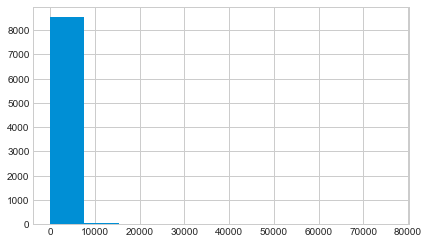

In [168]:
# Checking the distribution of Minimum payments.
plt.hist(credit_df['MINIMUM_PAYMENTS'])
plt.show()

In [169]:
# considering above histogram, imputing missing values with median
credit_df['MINIMUM_PAYMENTS'].fillna(credit_df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [170]:
# dropping null values from credit_limit (only one null value)
credit_df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [171]:
credit_df.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [172]:
# dropping customer ID, as it consists of all unique rows
credit_df.drop(['CUST_ID'], axis=1, inplace=True)

In [173]:
# checking unique values of the dataframe features
credit_df.nunique()

BALANCE                             8870
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4322
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8710
MINIMUM_PAYMENTS                    8635
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [174]:
plot = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

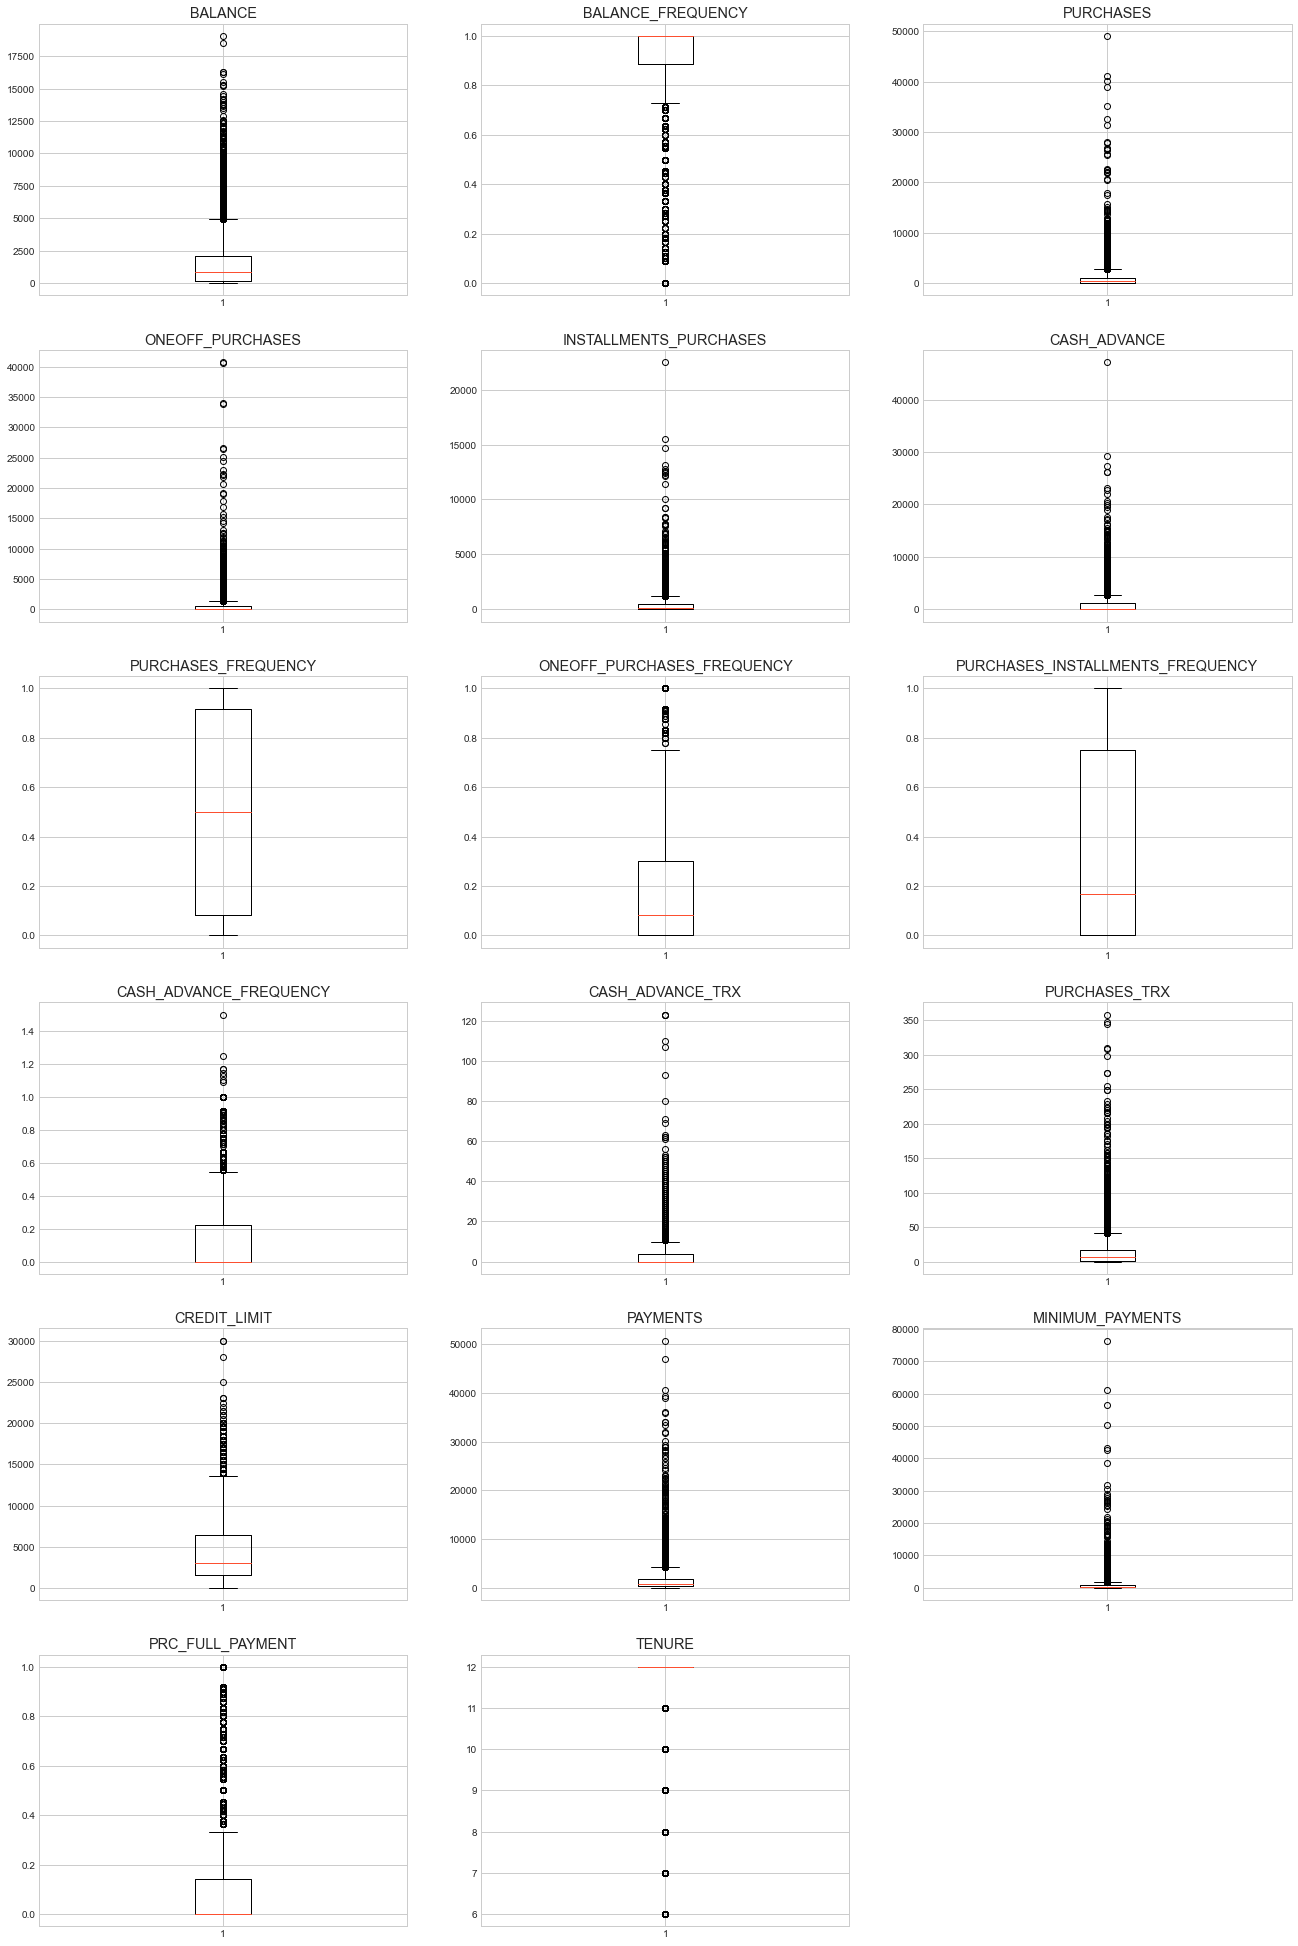

In [175]:
#box plot
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(credit_df[plot[i]].dropna())
    plt.title(plot[i])

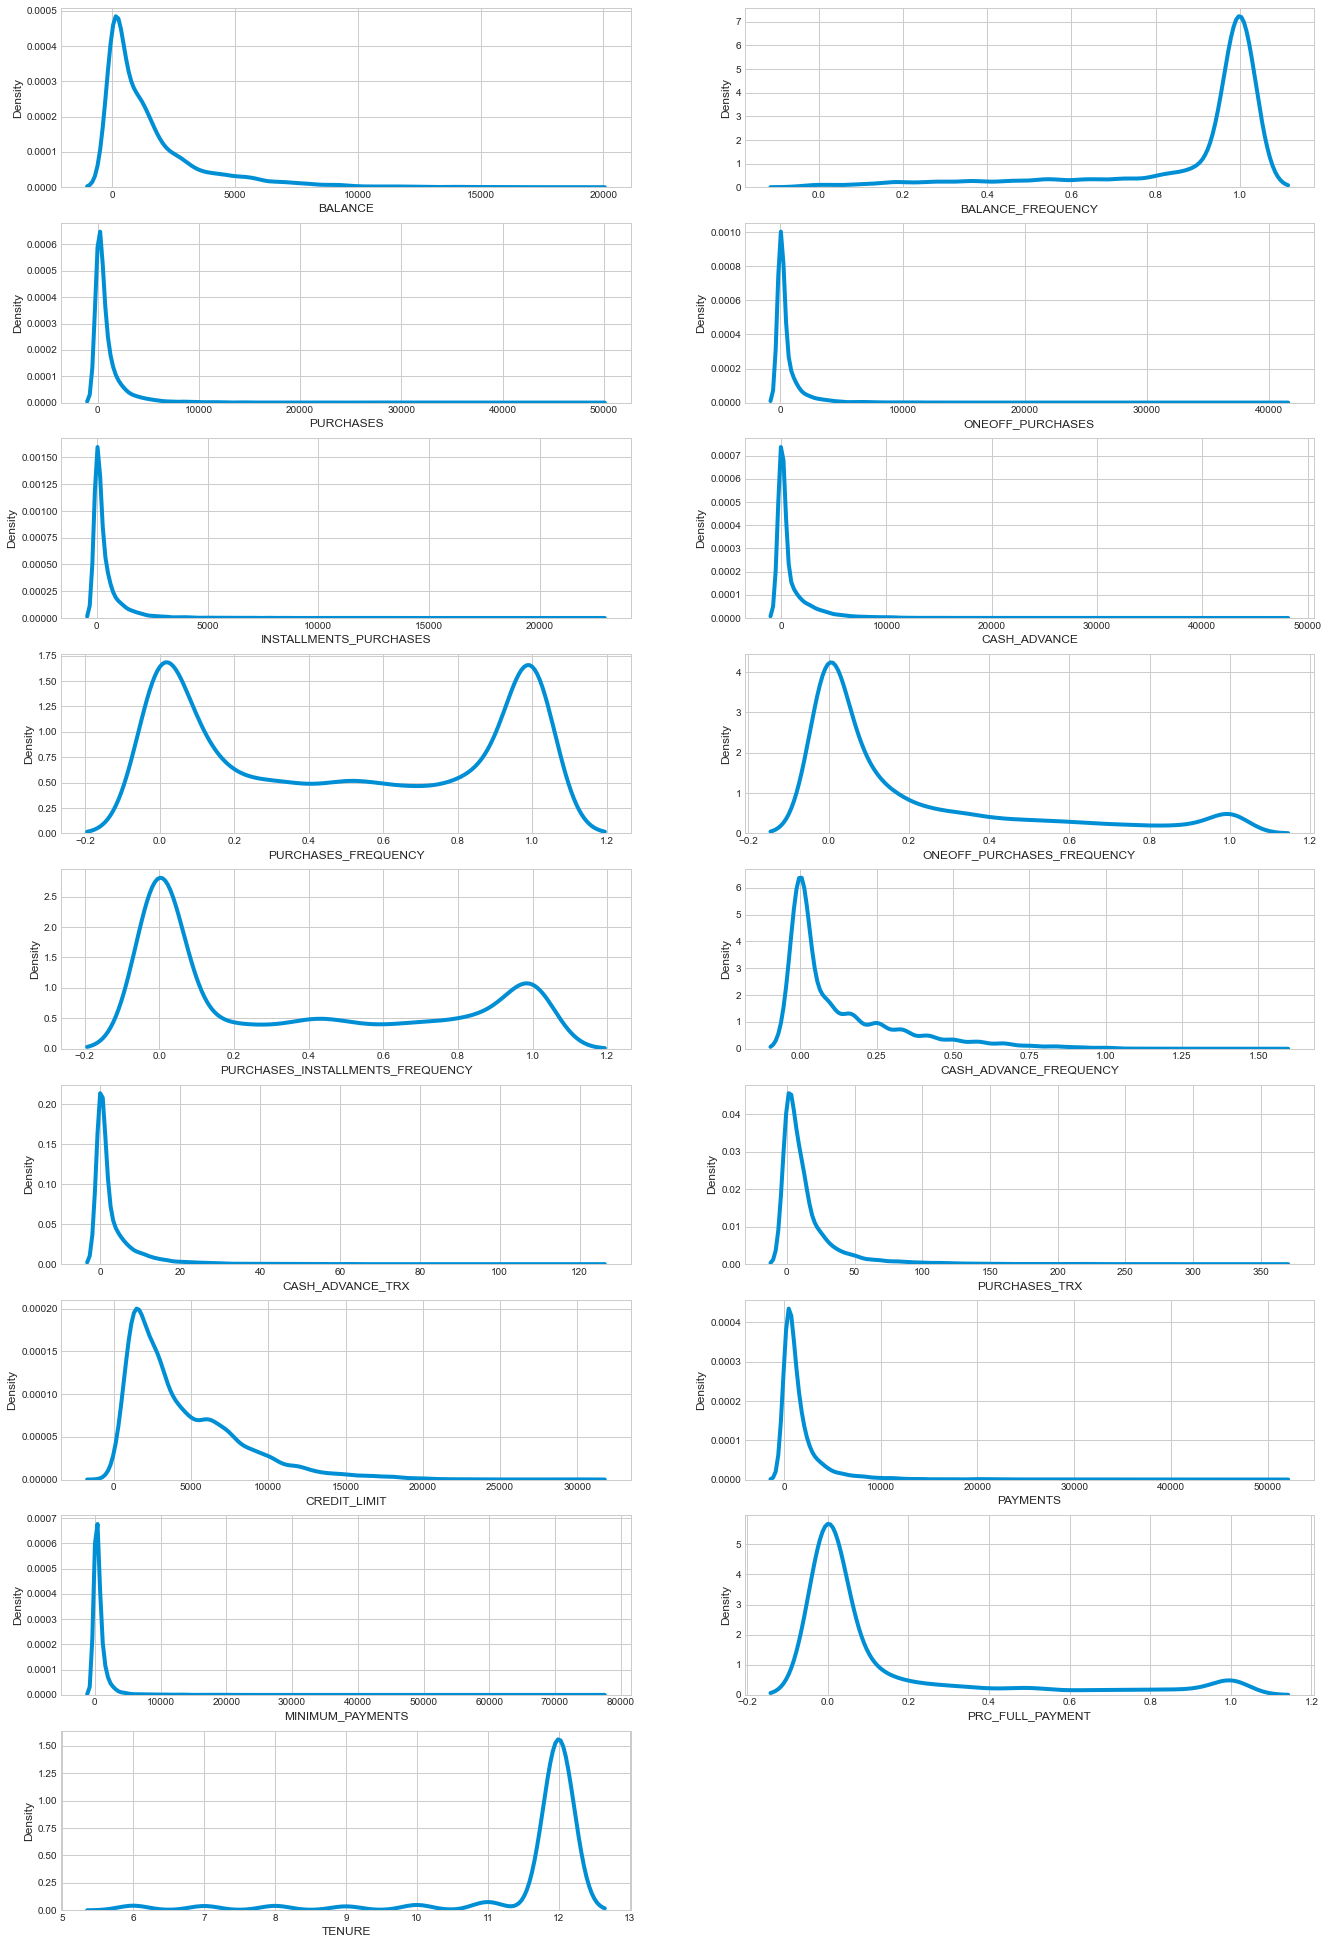

In [176]:
# visualise distribution
plt.figure(figsize=(20,35))
for i, col in enumerate(credit_df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()



### 4.1 Outlier handling

In [177]:
# outlier handling
# As we are interested in clustering of different of customer segments. I would like to minimally
# handle outlier so that our true customer segments remain intact.
# find outlier in the features
for i in credit_df.select_dtypes(include=['float64','int64']).columns:
  max_thresold=credit_df[i].quantile(0.95)
  min_thresold=credit_df[i].quantile(0.05)
  credit_df_no_outlier=credit_df[(credit_df[i] < max_thresold) & (credit_df[i] > min_thresold)].shape
  print(' Outlier in',i,'is:',int(((credit_df.shape[0]-credit_df_no_outlier[0])/credit_df.shape[0])*100),'%')

 Outlier in BALANCE is: 10 %
 Outlier in BALANCE_FREQUENCY is: 75 %
 Outlier in PURCHASES is: 27 %
 Outlier in ONEOFF_PURCHASES is: 53 %
 Outlier in INSTALLMENTS_PURCHASES is: 48 %
 Outlier in CASH_ADVANCE is: 56 %
 Outlier in PURCHASES_FREQUENCY is: 47 %
 Outlier in ONEOFF_PURCHASES_FREQUENCY is: 53 %
 Outlier in PURCHASES_INSTALLMENTS_FREQUENCY is: 58 %
 Outlier in CASH_ADVANCE_FREQUENCY is: 57 %
 Outlier in CASH_ADVANCE_TRX is: 56 %
 Outlier in PURCHASES_TRX is: 27 %
 Outlier in CREDIT_LIMIT is: 14 %
 Outlier in PAYMENTS is: 10 %
 Outlier in MINIMUM_PAYMENTS is: 10 %
 Outlier in PRC_FULL_PAYMENT is: 71 %
 Outlier in TENURE is: 91 %


Balance_frequency, Purchases_installments_frequency, Prc_full_payment, Tenure have the highest outlier

In [178]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.97))
    x = x.clip(lower=x.quantile(0.03))
    return x
credit_df1=credit_df.apply(lambda x: outlier_capping(x))

In [179]:
print(credit_df.shape)
print(credit_df1.shape)

(8949, 17)
(8949, 17)


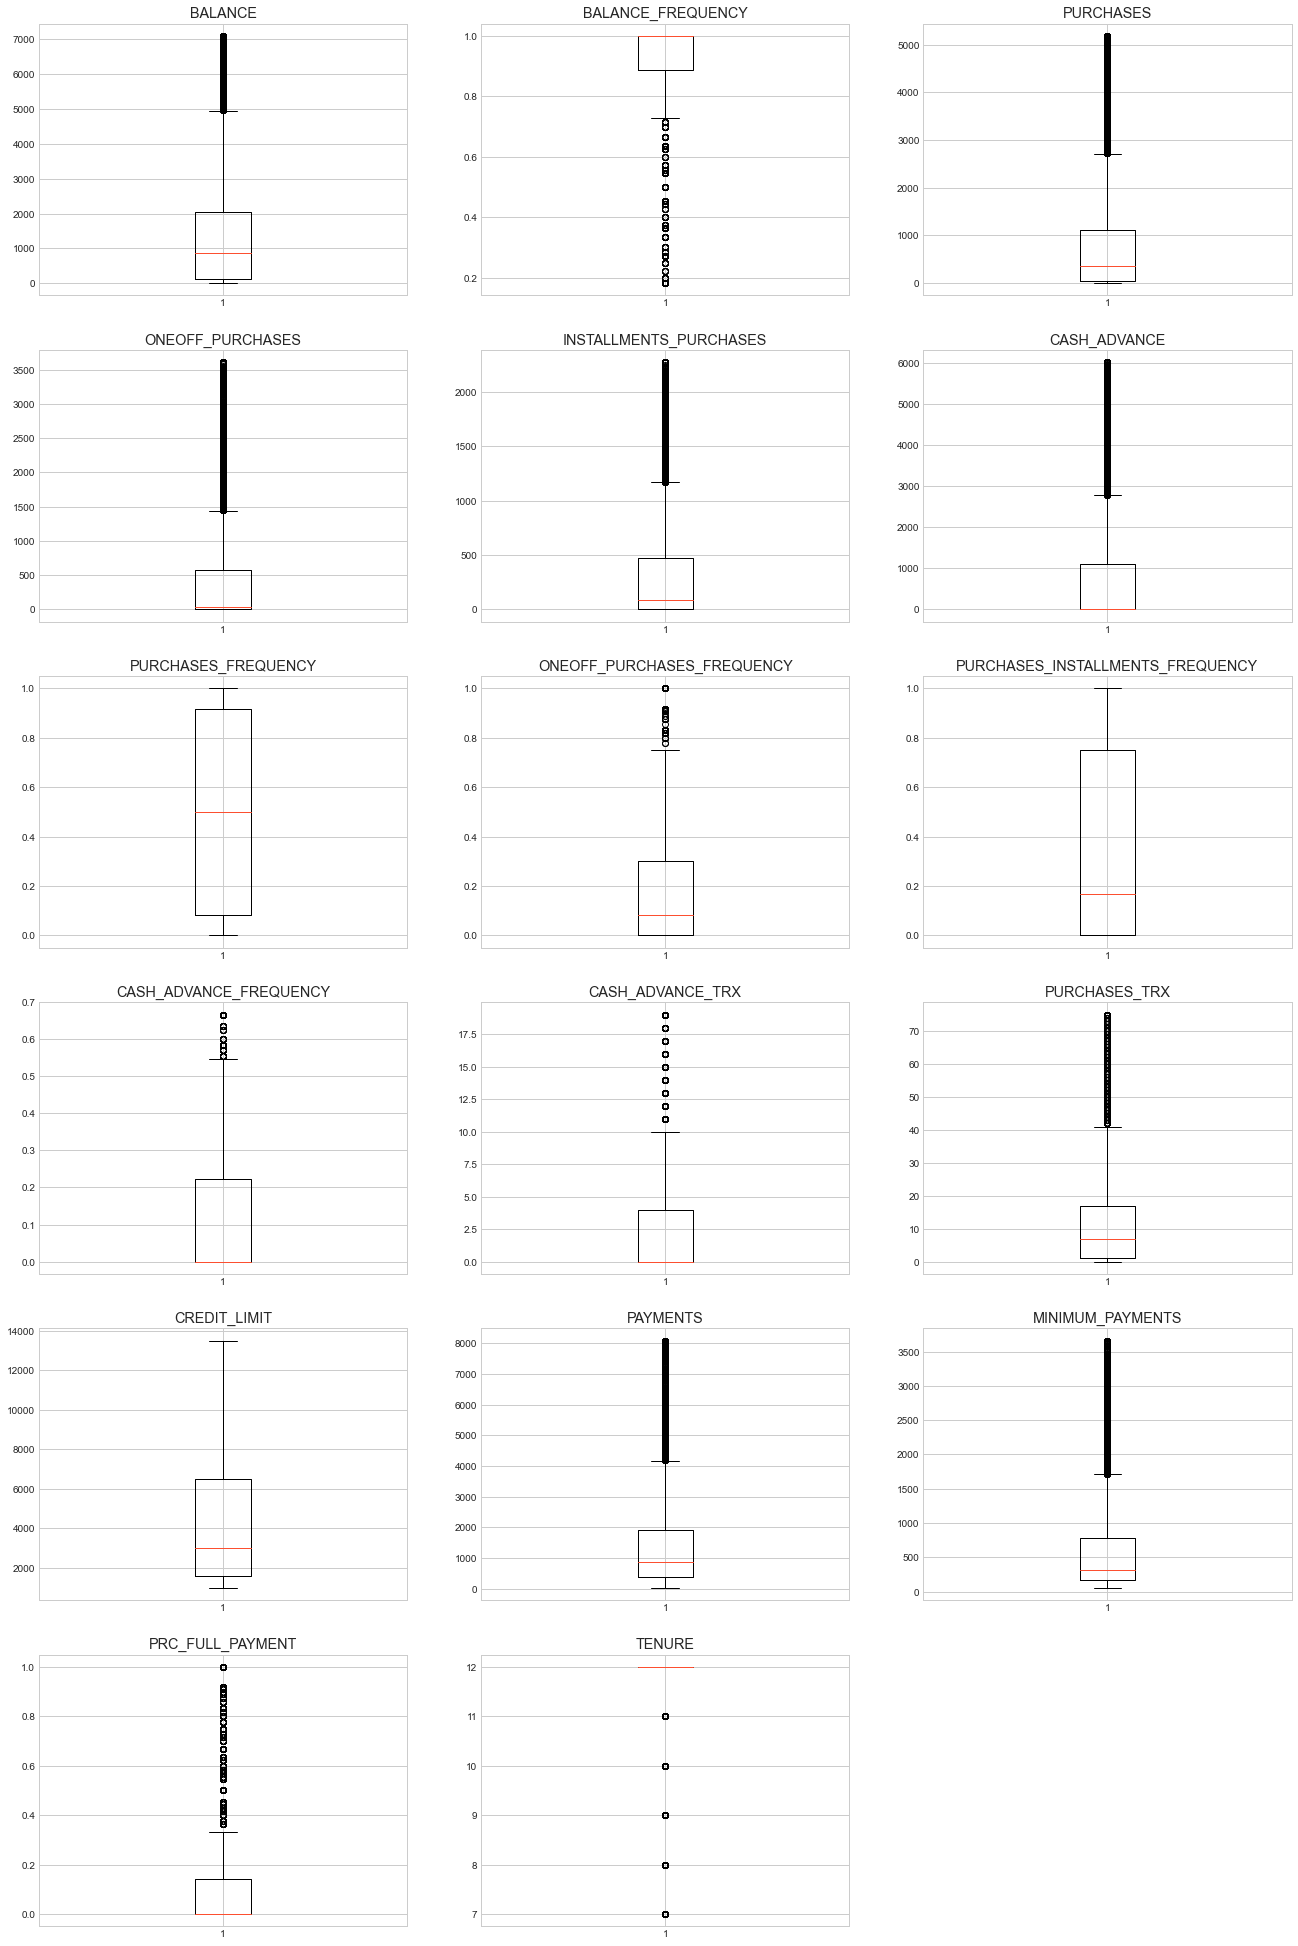

In [180]:
# recheck with box plot
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(credit_df1[plot[i]].dropna())
    plt.title(plot[i])

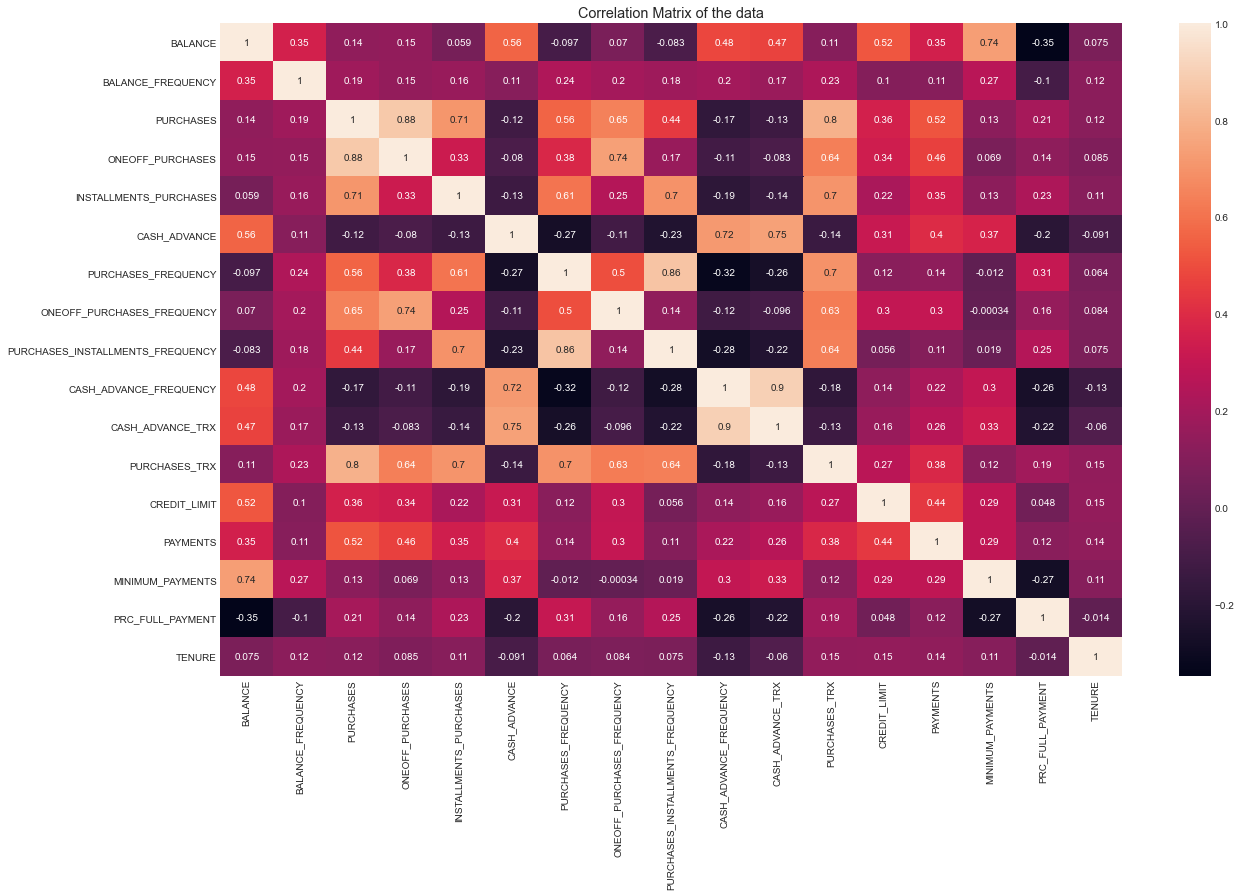

In [181]:
# corr matrix of the data

plt.figure(figsize=(18,12))
sns.heatmap(credit_df1.corr(), annot=True)

plt.title('Correlation Matrix of the data')
plt.show()


In [182]:
credit_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

**High correlation with**<br>
Purchases & one off purchases: 0.88<br>
Purchases fx and purchases installment: 0.86 fx<br>
Purchases & purchases trx: 0.80<br>
Cash_advance_fx & Cash_adv_trx: 0.90

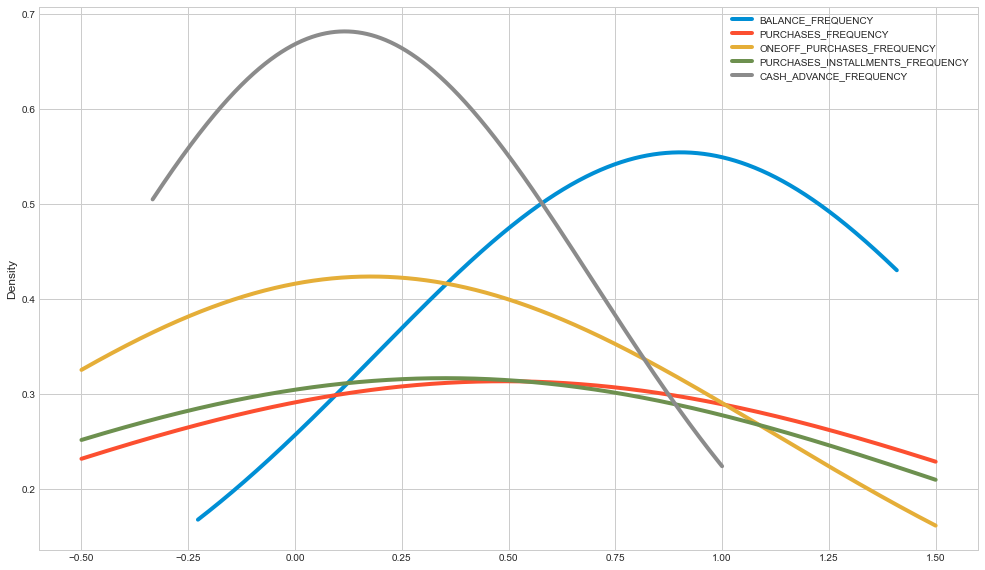

In [183]:

ax = credit_df1[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY']].plot.kde(figsize=(15,10), bw_method=3) 

In [184]:
# Dropping columns based on corr matrix and the kde plot
credit_df1.drop(['ONEOFF_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY'], axis=1, inplace=True)

In [185]:
credit_df1.head(20).T

0            1            2   \
BALANCE                       40.900749  3202.467416  2495.148862   
BALANCE_FREQUENCY              0.818182     0.909091     1.000000   
PURCHASES                     95.400000     0.000000   773.170000   
INSTALLMENTS_PURCHASES        95.400000     0.000000     0.000000   
CASH_ADVANCE                   0.000000  6011.667259     0.000000   
PURCHASES_FREQUENCY            0.166667     0.000000     1.000000   
ONEOFF_PURCHASES_FREQUENCY     0.000000     0.000000     1.000000   
CASH_ADVANCE_TRX               0.000000     4.000000     0.000000   
PURCHASES_TRX                  2.000000     0.000000    12.000000   
CREDIT_LIMIT                1000.000000  7000.000000  7500.000000   
PAYMENTS                     201.802084  4103.032597   622.066742   
MINIMUM_PAYMENTS             139.509787  1072.340217   627.284787   
PRC_FULL_PAYMENT               0.000000     0.222222     0.000000   
TENURE                        12.000000    12.000000    12.000000   

                                     3            4            5   \
BALANCE                     1666.670542   817.714335  1809.828751   
BALANCE_FREQUENCY              0.636364     1.000000     1.000000   
PURCHASES                   1499.000000    16.000000  1333.280000   
INSTALLMENTS_PURCHASES         0.000000     0.000000  1333.280000   
CASH_ADVANCE                 205.788017     0.000000     0.000000   
PURCHASES_FREQUENCY            0.083333     0.083333     0.666667   
ONEOFF_PURCHASES_FREQUENCY     0.083333     0.083333     0.000000   
CASH_ADVANCE_TRX               1.000000     0.000000     0.000000   
PURCHASES_TRX                  1.000000     1.000000     8.000000   
CREDIT_LIMIT                7500.000000  1200.000000  1800.000000   
PAYMENTS                      28.457827   678.334763  1400.057770   
MINIMUM_PAYMENTS             312.343947   244.791237  2407.246035   
PRC_FULL_PAYMENT               0.000000     0.000000     0.000000   
TENURE                        12.000000    12.000000    12.000000   

                                      6            7            8   \
BALANCE                       627.260806  1823.652743  1014.926473   
BALANCE_FREQUENCY               1.000000     1.000000     1.000000   
PURCHASES                    5183.838400   436.200000   861.490000   
INSTALLMENTS_PURCHASES        688.380000   436.200000   200.000000   
CASH_ADVANCE                    0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY             1.000000     1.000000     0.333333   
ONEOFF_PURCHASES_FREQUENCY      1.000000     0.000000     0.083333   
CASH_ADVANCE_TRX                0.000000     0.000000     0.000000   
PURCHASES_TRX                  64.000000    12.000000     5.000000   
CREDIT_LIMIT                13500.000000  2300.000000  7000.000000   
PAYMENTS                     6354.314328   679.065082   688.278568   
MINIMUM_PAYMENTS              198.065894   532.033990   311.963409   
PRC_FULL_PAYMENT                1.000000     0.000000     0.000000   
TENURE                         12.000000    12.000000    12.000000   

                                      9            10           11  \
BALANCE                       152.225975  1293.124939   630.794744   
BALANCE_FREQUENCY               0.545455     1.000000     0.818182   
PURCHASES                    1281.600000   920.120000  1492.180000   
INSTALLMENTS_PURCHASES          0.000000   920.120000     0.000000   
CASH_ADVANCE                    0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY             0.166667     1.000000     0.250000   
ONEOFF_PURCHASES_FREQUENCY      0.166667     0.000000     0.250000   
CASH_ADVANCE_TRX                0.000000     0.000000     0.000000   
PURCHASES_TRX                   3.000000    12.000000     6.000000   
CREDIT_LIMIT                11000.000000  1200.000000  2000.000000   
PAYMENTS                     1164.770591  1083.301007   705.618627   
MINIMUM_PAYMENTS              100.302262  2172.697765   155.549069   
PRC_

## 5. Standardizing the data

In [186]:
from sklearn.preprocessing import StandardScaler 

std = StandardScaler()
scaled_df = pd.DataFrame(std.fit_transform(credit_df1))

In [293]:
scaled_df.head()

0         1         2         3         4         5         6   \
0 -0.800704 -0.270013 -0.622154 -0.465966 -0.574871 -0.806649 -0.678716   
1  0.935587  0.127925 -0.698769 -0.636148  3.393898 -1.221928 -0.678716   
2  0.547137  0.525863 -0.077842 -0.636148 -0.574871  1.269742  2.673295   
3  0.092148 -1.065889  0.505067 -0.636148 -0.439014 -1.014290 -0.399383   
4 -0.374088  0.525863 -0.685920 -0.636148 -0.574871 -1.014290 -0.399383   

         7         8         9         10        11        12        13  
0 -0.604597 -0.636510 -1.022798 -0.732602 -0.634194 -0.525588  0.367851  
1  0.232656 -0.748252  0.771112  1.378244  0.491772  0.234159  0.367851  
2 -0.604597 -0.077803  0.920605 -0.505209 -0.045429 -0.525588  0.367851  
3 -0.395284 -0.692381  0.920605 -0.826394 -0.425576 -0.525588  0.367851  
4 -0.604597 -0.692381 -0.963001 -0.474764 -0.507115 -0.525588  0.367851

## 6. Clustering

### 6.1 K-Means

In [188]:
## Kmeans clustering with two PC
kmean_df = scaled_df.copy()

kmeans = KMeans(n_clusters=2, random_state=44)
kmean_df['kmean_pred'] = kmeans.fit_predict(kmean_df)

In [190]:
kmean_df.shape

(8949, 15)

In [192]:
kmean_df.head()

0         1         2         3         4         5         6  \
0 -0.800704 -0.270013 -0.622154 -0.465966 -0.574871 -0.806649 -0.678716   
1  0.935587  0.127925 -0.698769 -0.636148  3.393898 -1.221928 -0.678716   
2  0.547137  0.525863 -0.077842 -0.636148 -0.574871  1.269742  2.673295   
3  0.092148 -1.065889  0.505067 -0.636148 -0.439014 -1.014290 -0.399383   
4 -0.374088  0.525863 -0.685920 -0.636148 -0.574871 -1.014290 -0.399383   

          7         8         9        10        11        12        13  \
0 -0.604597 -0.636510 -1.022798 -0.732602 -0.634194 -0.525588  0.367851   
1  0.232656 -0.748252  0.771112  1.378244  0.491772  0.234159  0.367851   
2 -0.604597 -0.077803  0.920605 -0.505209 -0.045429 -0.525588  0.367851   
3 -0.395284 -0.692381  0.920605 -0.826394 -0.425576 -0.525588  0.367851   
4 -0.604597 -0.692381 -0.963001 -0.474764 -0.507115 -0.525588  0.367851   

   kmean_pred  
0           0  
1           0  
2           1  
3           0  
4           0

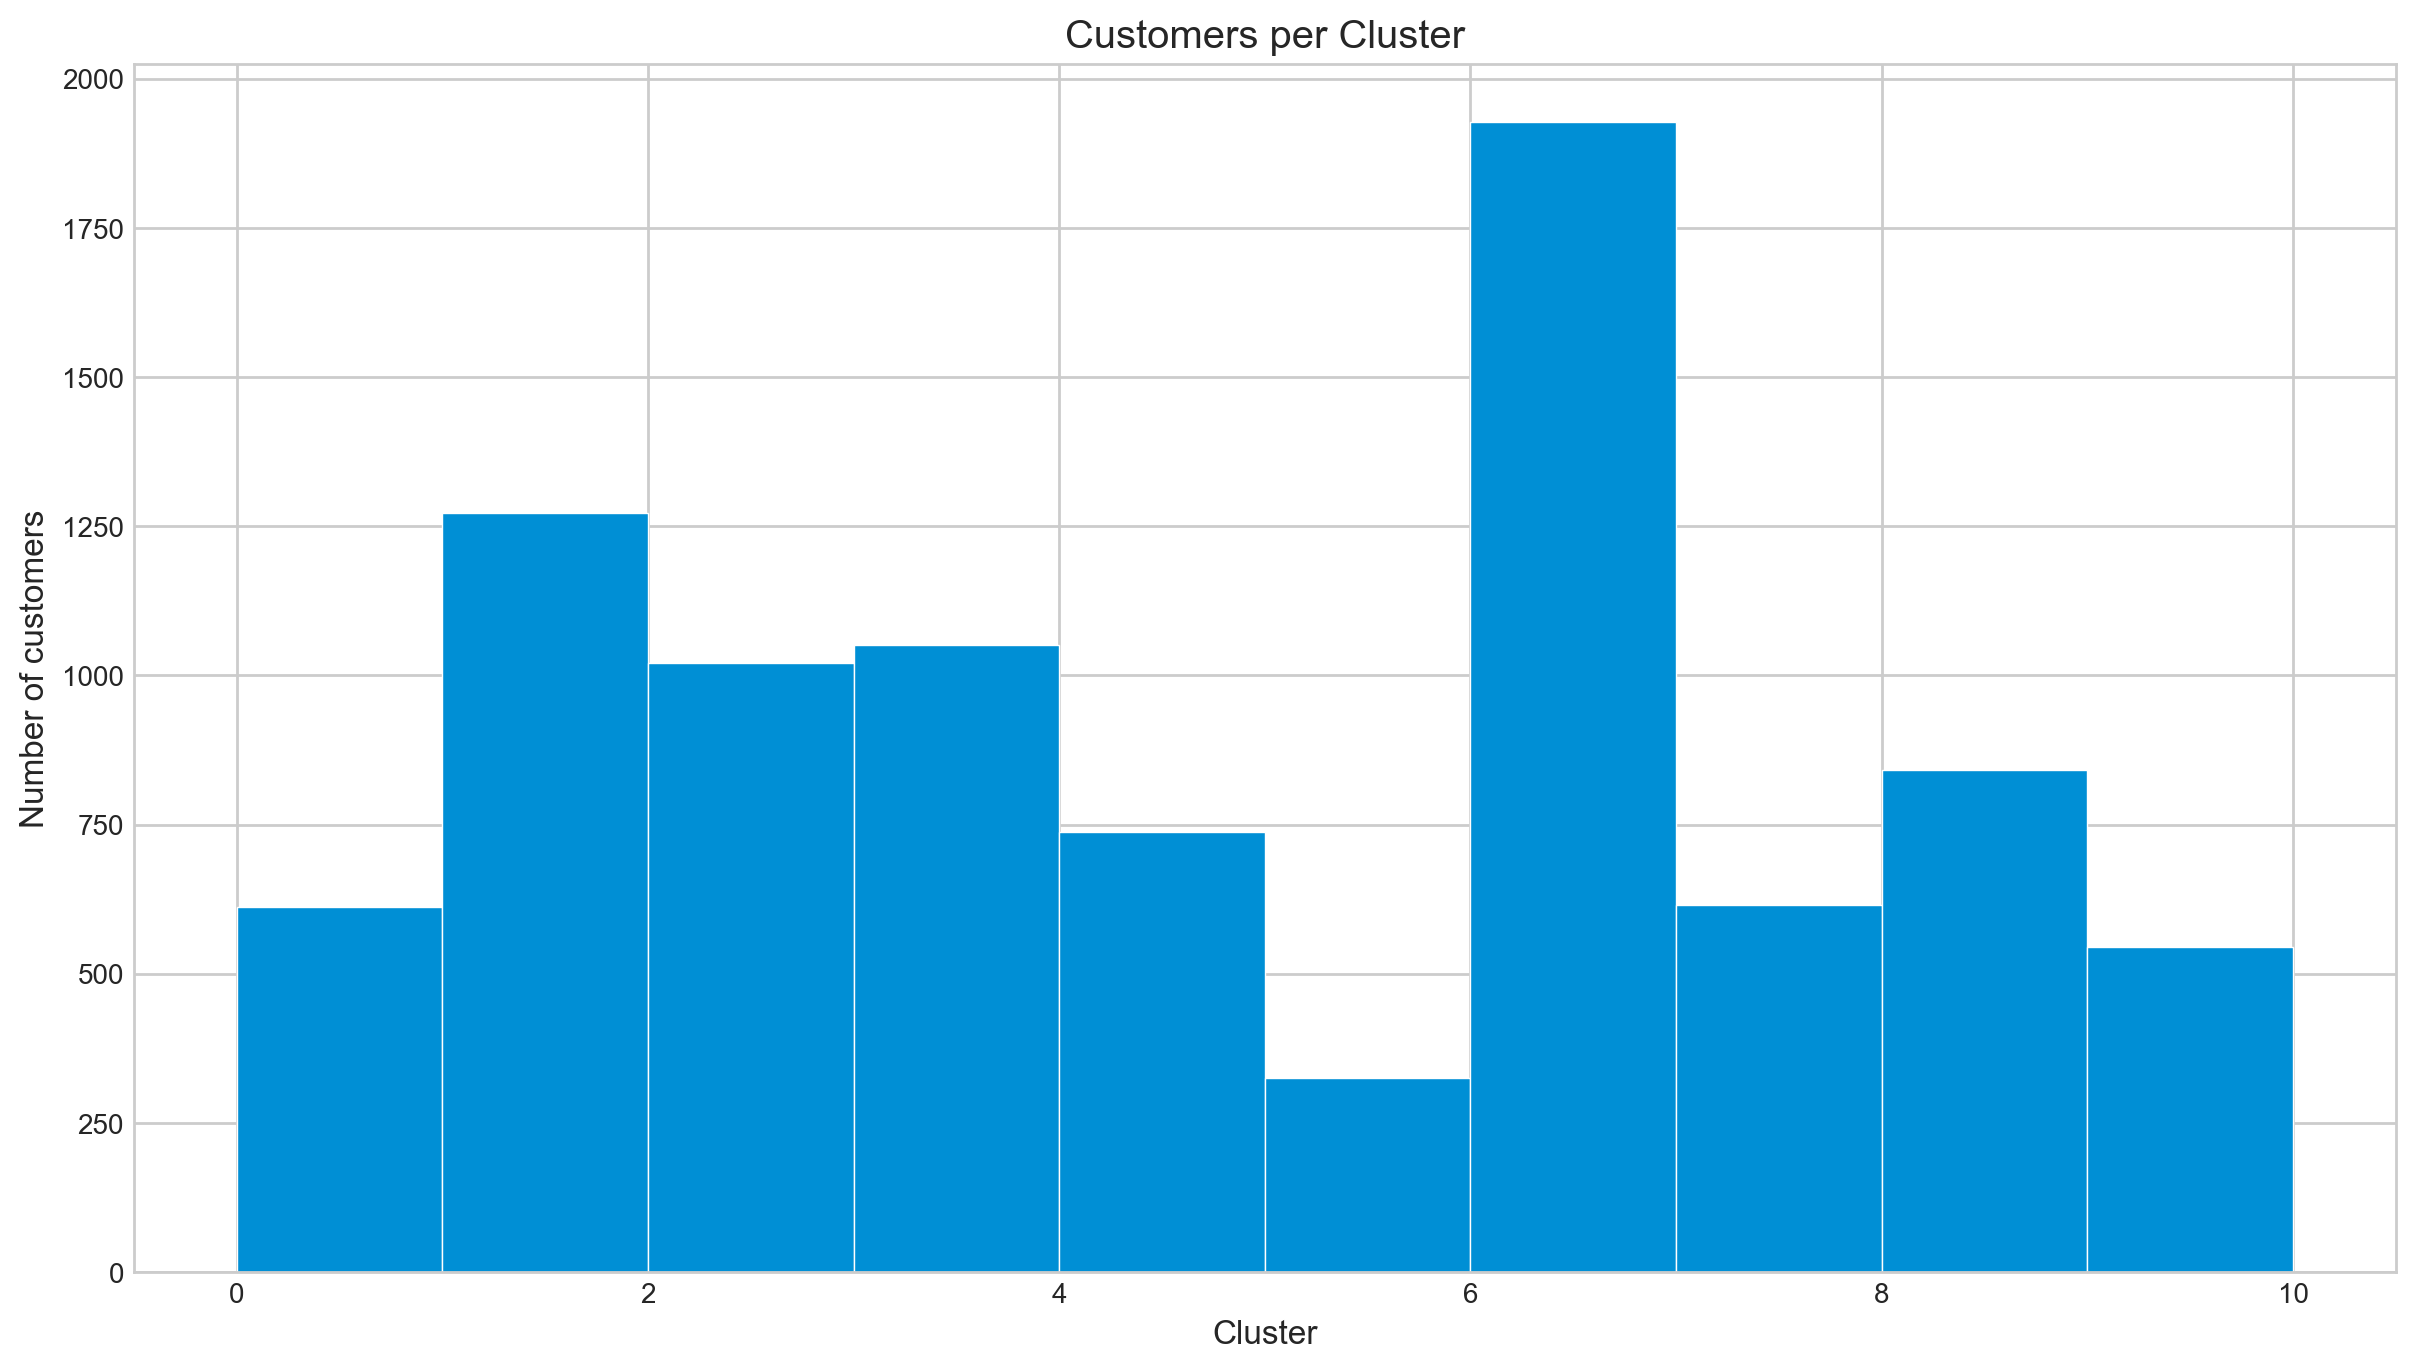

In [211]:
# Custumers per cluster
kmean_df = scaled_df.copy()
n_clusters = 10
clustering = KMeans(n_clusters=10,random_state=44)

kmean_df['cluster_labels'] = clustering.fit_predict(kmean_df)

# plot cluster sizes
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(13,8))
plt.hist(kmean_df.cluster_labels, bins=range(n_clusters+1),edgecolor='w')
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.show()

#### 6.1.1  Hyperparameter tuning

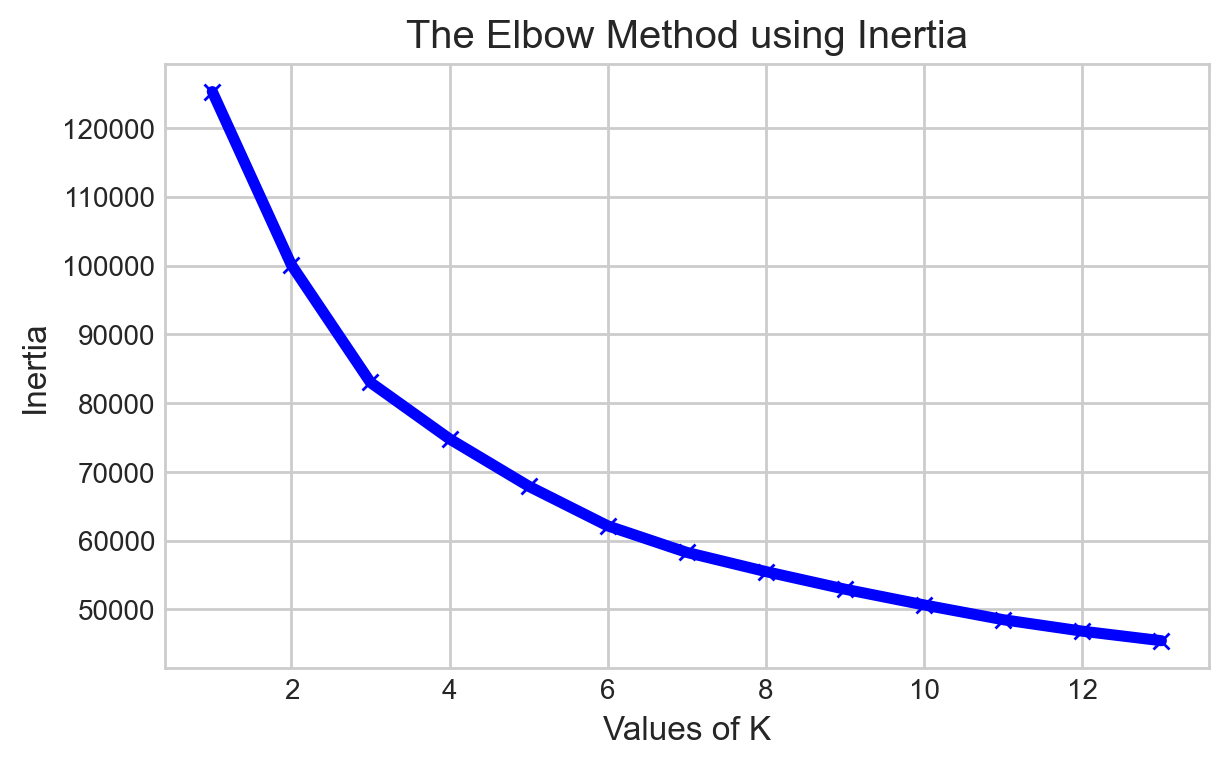

In [215]:
# find best 'k' value with elbow method
inertia=[]
range_val=range(1,14)
for i in range_val:
  kmean=KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(kmean_df.iloc[:, 0:14]))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

K= 4 seems to be a better selection

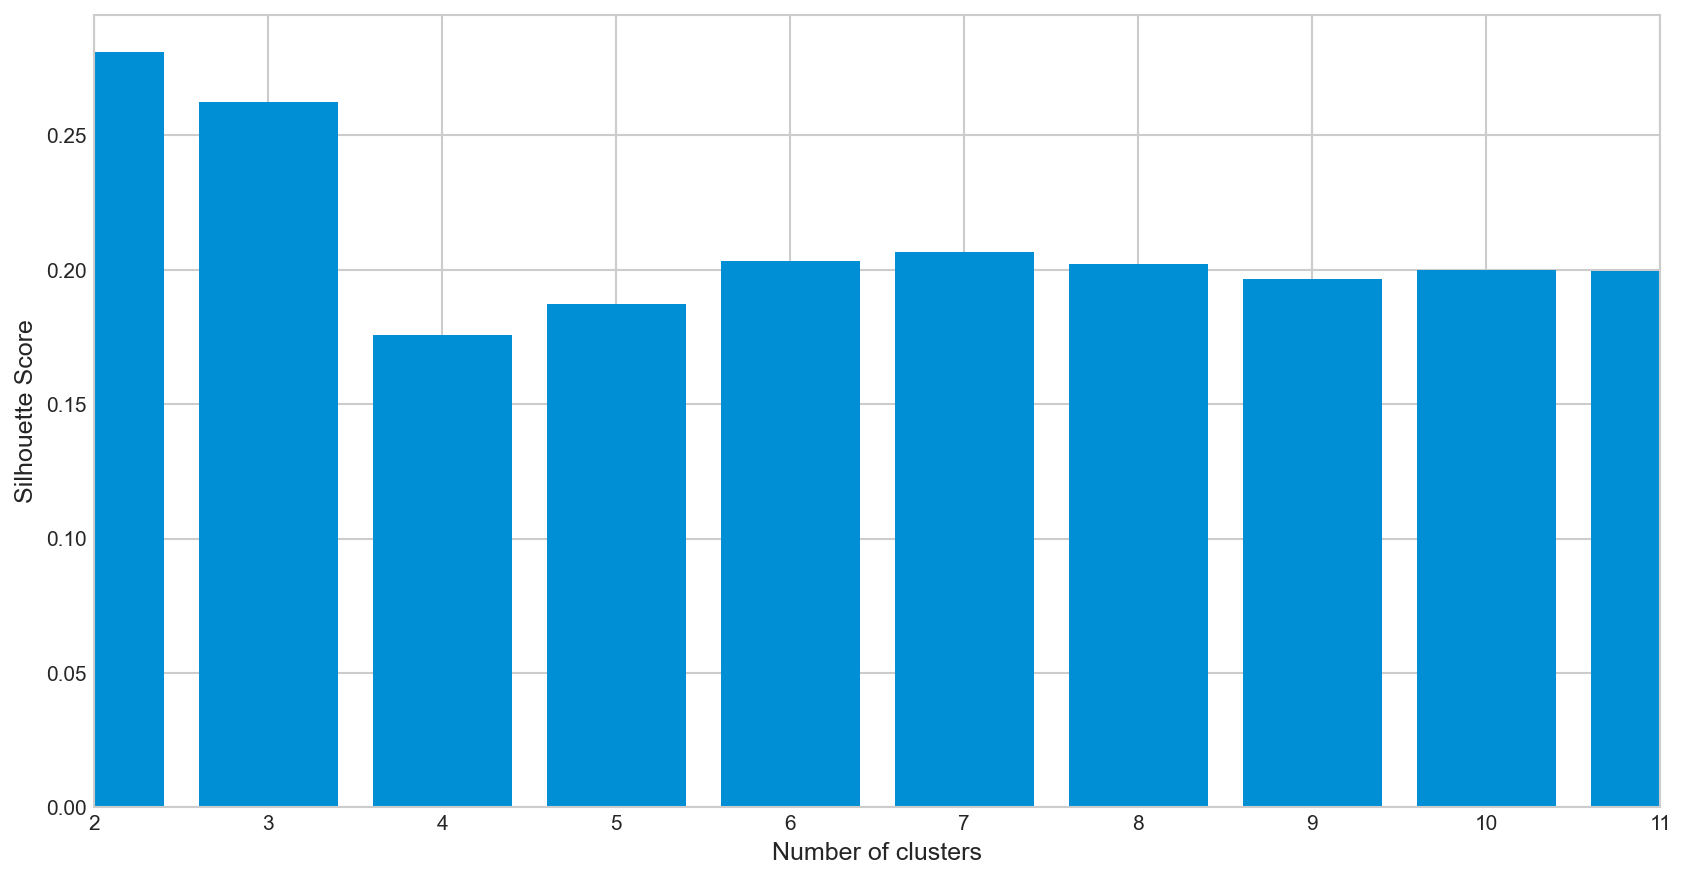

In [229]:
# checking with Silhouette Score
n_cluster = 11
silhouette_scores = [] 

for n_cluster in range(2, 12):
    silhouette_scores.append(silhouette_score(kmean_df.iloc[:, 0:14], KMeans(n_clusters = n_cluster).fit_predict(kmean_df.iloc[:, 0:14]))) 
    
# Comparing the results with bar graph.
k = [2, 3, 4, 5, 6,7,8,9,10,11] 
plt.rcParams['figure.dpi'] = 150
plt.figure(figsize=(12,7))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score')
plt.xlim(2,11)
plt.show()

So, according to the bar graph, 3 cluster solution is the better choice. 

In [237]:
kmeans_Sil=[]

for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, random_state=44).fit_predict(kmean_df.iloc[:, 0:14])
    sil_score = metrics.silhouette_score(kmean_df.iloc[:, 0:14],kmeans, metric='euclidean')
    print("The Silhouette score for {} cluster K-Means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(kmean_df.iloc[:, 0:14], kmeans, metric='euclidean')))
    kmeans_Sil.append((cluster,sil_score))



The Silhouette score for 2 cluster K-Means: 0.281
The Silhouette score for 3 cluster K-Means: 0.263
The Silhouette score for 4 cluster K-Means: 0.176
The Silhouette score for 5 cluster K-Means: 0.188
The Silhouette score for 6 cluster K-Means: 0.204
The Silhouette score for 7 cluster K-Means: 0.207
The Silhouette score for 8 cluster K-Means: 0.202
The Silhouette score for 9 cluster K-Means: 0.205
The Silhouette score for 10 cluster K-Means: 0.201
The Silhouette score for 11 cluster K-Means: 0.200
The Silhouette score for 12 cluster K-Means: 0.190
The Silhouette score for 13 cluster K-Means: 0.203
The Silhouette score for 14 cluster K-Means: 0.196
The Silhouette score for 15 cluster K-Means: 0.198
The Silhouette score for 16 cluster K-Means: 0.200
The Silhouette score for 17 cluster K-Means: 0.204
The Silhouette score for 18 cluster K-Means: 0.205
The Silhouette score for 19 cluster K-Means: 0.209


So, the Silhouette score made a difficult turn on cluster size. I would like to choose 3 cluster, which is the better one and 7 cluster to see for little elaborative view of the cluster.

### 6.2 DBSCAN

In [240]:
dbscan_df = scaled_df.copy()

In [265]:
# Defining the DBSCAN clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=40)
dbscan_cluster.fit(X)
clusters = X.copy() 
clusters['cluster_pred']= dbscan_cluster.fit_predict(X)

print("The silhouette score of the DBSCAN solution is: {}"
      .format(metrics.silhouette_score(X, clusters.cluster_pred, metric='euclidean')))

The silhouette score of the DBSCAN solution is: 0.09767610252669132


#### 6.2.1 Tuning DBSCAN

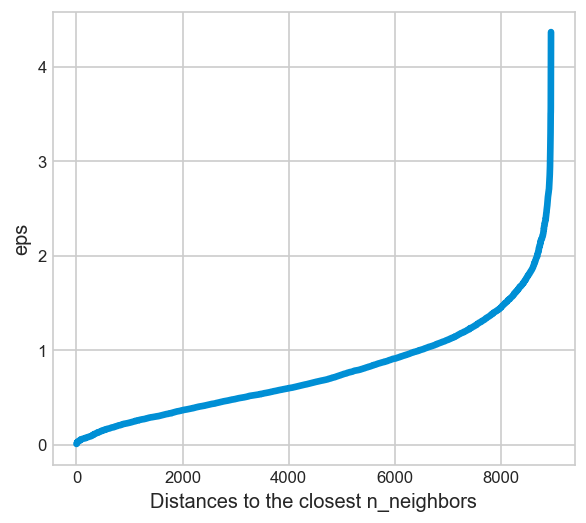

In [244]:
# finding the best eps
from sklearn.neighbors import NearestNeighbors
X = dbscan_df

neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)


#plotting the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.dpi'] = 120
plt.figure(figsize = (5, 5))

plt.style.use("seaborn-whitegrid")
plt.plot(distances)
plt.xlabel("Distances to the closest n_neighbors")
plt.ylabel("eps")
plt.show()

In [266]:
# Defining the DBSCAN clustering after hyperparameter tuning
dbscan_cluster = DBSCAN(eps=1.7, min_samples=40)
dbscan_cluster.fit(X)
clusters = X.copy() 
clusters['cluster_pred']= dbscan_cluster.fit_predict(X)

print("The silhouette score of the DBSCAN solution is: {}"
      .format(metrics.silhouette_score(X, clusters.cluster_pred, metric='euclidean')))

The silhouette score of the DBSCAN solution is: 0.2901038909443603


### 6.3 Gaussian mixture 

In [248]:
gmm_df = scaled_df.copy()

In [250]:
# Defining the GaussianMixture model
X = gmm_df 
gmm_cluster = GaussianMixture(n_components=3, random_state=44)

# Fit model
gmm_cluster.fit(X)
clusters = X.copy()
clusters['cluster_pred'] = gmm_cluster.fit_predict(X)

print("The silhouette score of the GMM solution is: {}"
      .format(metrics.silhouette_score(X, clusters.cluster_pred, metric='euclidean')))

The silhouette score of the GMM solution is: 0.08487920347783318


#### 6.3.1 Tuning GMM


In [259]:
sil_GMM = []

for cluster in range(2,20,2):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type, random_state = 44).fit_predict(gmm_df)
        sil_score = metrics.silhouette_score(gmm_df, gmm, metric='euclidean')
        sil_GMM.append((cluster, sil_score, covariance_type))
        
GMM_score = pd.DataFrame(sil_GMM, columns=['cluster', 'sil_score','cov_type'])


In [260]:
# plotting the table

GMM_score.sort_values('sil_score', ascending=False).head()

cluster  sil_score cov_type
1         2   0.328483     tied
33       18   0.183845     tied
13        8   0.177422     tied
17       10   0.175473     tied
29       16   0.171237     tied

## 7. Comparing results


In [267]:
kmeans3_ = KMeans(n_clusters=3, random_state=44).fit_predict(scaled_df)
kmeans7_ = KMeans(n_clusters=7, random_state=44).fit_predict(scaled_df)
dbscan_= DBSCAN(eps=1.7, min_samples=40).fit_predict(scaled_df)
gmm_ = GaussianMixture(n_components=8, covariance_type='spherical', random_state=44).fit_predict(scaled_df)

kmeans_3Silhouette_Score = metrics.silhouette_score(scaled_df, kmeans3_, metric='euclidean')
kmeans_7Silhouette_Score = metrics.silhouette_score(scaled_df, kmeans7_, metric='euclidean')
DBSCAN_Silhouette_Score = metrics.silhouette_score(scaled_df, dbscan_, metric='euclidean')
GMM_Silhouette_Score = metrics.silhouette_score(scaled_df, gmm_, metric='euclidean')


In [268]:
All_clustering_Scores  = [ ['KMeans3',kmeans_3Silhouette_Score ],['KMeans7',kmeans_7Silhouette_Score ], ['GMM', GMM_Silhouette_Score],['DBSCAN', DBSCAN_Silhouette_Score]]

All_clustering_Scores  = pd.DataFrame(All_clustering_Scores, columns=['Clustering Method', 'Silhouette Score']) 
All_clustering_Scores.sort_values(by='Silhouette Score', ascending= False)

Clustering Method  Silhouette Score
3            DBSCAN          0.290104
0           KMeans3          0.262684
1           KMeans7          0.206819
2               GMM          0.134171

## 8. Dimensionality reduction

### 8.1 PCA

In [66]:
#dimension = no of variables(use all to see how many of PCs are going to be chosen)
pca = PCA(n_components=14)
pca_df = pca.fit_transform(scaled_df) 
pca_df = pd.DataFrame(data=pca_df, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6','PC 7',
                                            'PC 8','PC 9','PC 10','PC 11','PC 12','PC 13','PC 14'])



In [68]:
pca_df.head()

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0 -1.975532 -0.988619 -0.622775 -0.409078  0.009908  0.099039  0.556580   
1 -0.609497  3.222257  1.530252 -0.771585 -0.609444  0.464412 -0.247812   
2  1.275834 -0.401532 -1.068482 -0.073350 -0.679159 -2.473542 -0.647571   
3 -1.060206 -0.091391  0.121503 -1.216367  0.872967 -0.970039 -0.157833   
4 -1.756287 -0.512300 -0.979524 -0.292826 -0.440543 -0.108953  0.273109   

       PC 8      PC 9     PC 10     PC 11     PC 12     PC 13     PC 14  
0  0.066308  0.330760 -0.143970 -0.172744 -0.023057 -0.085365  0.012376  
1  0.144243  0.521268  0.923458 -1.674485 -0.425746 -0.555205  0.135865  
2 -0.137272 -0.786886  0.656574  0.175520 -0.652673  0.383046 -0.596787  
3 -0.595451  0.222083 -0.775319  0.028551 -0.163343  0.255043  0.701402  
4  0.392470  0.732332 -0.179361 -0.222634  0.041954 -0.005504 -0.173829

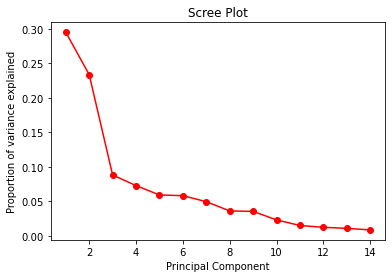

Proportion of Variance Explained: [0.29523385 0.23372414 0.08830842 0.07292761 0.05941557 0.05835769
 0.04963341 0.03624357 0.03555692 0.02327738 0.0151189  0.01249227
 0.01099696 0.00871331]
Cumulative proportion of the PC: [0.29523385 0.52895799 0.61726641 0.69019402 0.74960959 0.80796728
 0.85760069 0.89384426 0.92940118 0.95267856 0.96779746 0.98028973
 0.99128669 1.        ]


In [69]:
PC_val = np.arange(pca.n_components_)+1
plt.plot(PC_val, pca.explained_variance_ratio_, 'ro-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of variance explained')
plt.show()

# printing the variance ratio
print('Proportion of Variance Explained:', pca.explained_variance_ratio_)

# cumulative summing
out_pca = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative proportion of the PC:', out_pca)

### 8.2 UMAP


In [119]:
# DR with UMAP

umap_df = scaled_df.copy()

X = umap_df

#Apply UMAP to the data
umap_results = umap.UMAP(n_neighbors=6,

                      min_dist=0.3,

                      metric='correlation').fit_transform(X)

In [121]:
print(umap_results.shape)

(8949, 2)


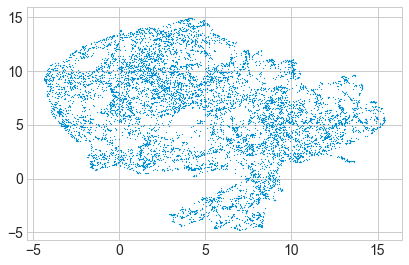

In [122]:
plt.scatter(umap_results[:,0], umap_results[:,1], s = 0.5)

## 9. Clustering

### 9.1 K-Means Clustering

In [71]:
## Kmeans clustering with two PC
X = pca_df[['PC 1', 'PC 2']]

kmeans = KMeans(n_clusters=2, random_state=44)
kmeans.fit(X)
clusters = X.copy() 
clusters['cluster_pred'] = kmeans.fit_predict(X)

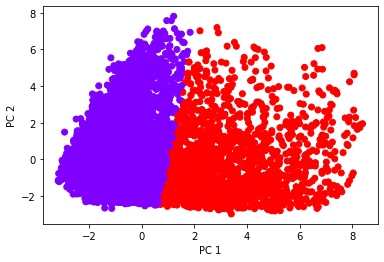

In [73]:
#plotting
plt.scatter(clusters['PC 1'],clusters['PC 2'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


C:\Anaconda_2021\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


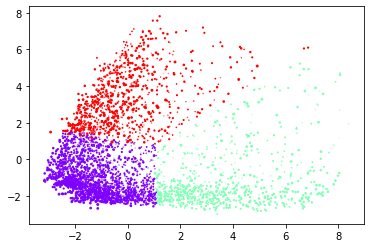

In [84]:
## Kmeans clustering with three PC
X = pca_df[['PC 1', 'PC 2', 'PC 3']]

kmeans = KMeans(n_clusters=3, random_state=44)
kmeans.fit(X)
clusters = X.copy() 
clusters['cluster_pred'] = kmeans.fit_predict(X)

#plotting
plt.scatter(clusters['PC 1'],clusters['PC 2'],clusters['PC 3'],c=clusters['cluster_pred'],cmap='rainbow')
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
plt.show()

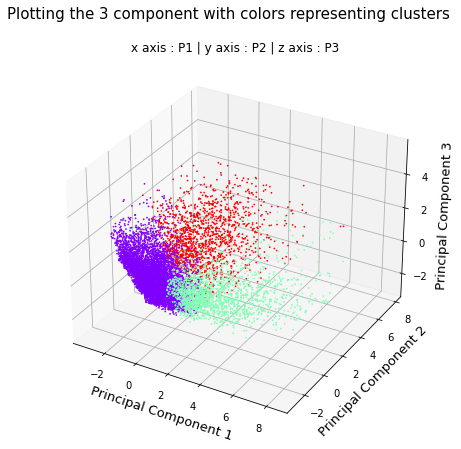

In [79]:
fig = plt.figure(figsize = (7, 7))
plt.suptitle("Plotting the 3 component with colors representing clusters", fontsize = 15)
             
x, s1 = clusters['PC 1'], "Principal Component 1"
y, s2 = clusters['PC 2'], "Principal Component 2"
z, s3 = clusters['PC 3'], "Principal Component 3"

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = clusters['cluster_pred'],cmap='rainbow', s=0.5, alpha = 1)
plt.title('x axis : P1 | y axis : P2 | z axis : P3')
ax.set_xlabel(s1, fontsize = 13)
ax.set_ylabel(s2, fontsize = 13)
ax.set_zlabel(s3, fontsize = 13)

plt.show()

#### 9.1.1 Hyperparameter tuning 

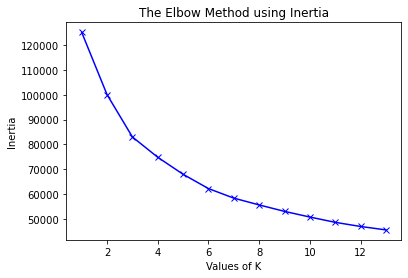

In [80]:
# find best 'k' value 
inertia=[]
range_val=range(1,14)
for i in range_val:
  kmean=KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(pca_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

K = 4 seems to be the best one according to the figure.

In [99]:
## Kmeans clustering with three PC with four clusters
X = pca_df[['PC 1', 'PC 2', 'PC 3']]

kmeans = KMeans(n_clusters=4, random_state=44)
kmeans.fit(X)
clusters = X.copy() 
clusters['cluster_pred'] = kmeans.fit_predict(X)

print("The silhouette score of the K-Means cluster is: {}"
      .format(metrics.silhouette_score(X, clusters.cluster_pred, metric='euclidean')))

The silhouette score of the K-Means cluster is: 0.30409340738736673


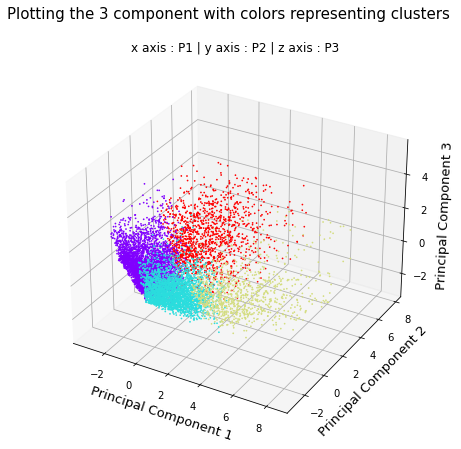

In [82]:
fig = plt.figure(figsize = (7, 7))
plt.suptitle("Plotting the  component with colors representing clusters", fontsize = 15)
             
x, s1 = clusters['PC 1'], "Principal Component 1"
y, s2 = clusters['PC 2'], "Principal Component 2"
z, s3 = clusters['PC 3'], "Principal Component 3"

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = clusters['cluster_pred'],cmap='rainbow', s=0.5, alpha = 1)
plt.title('x axis : P1 | y axis : P2 | z axis : P3')
ax.set_xlabel(s1, fontsize = 13)
ax.set_ylabel(s2, fontsize = 13)
ax.set_zlabel(s3, fontsize = 13)

plt.show()

### 9.2 DBSCAN approach to clustering

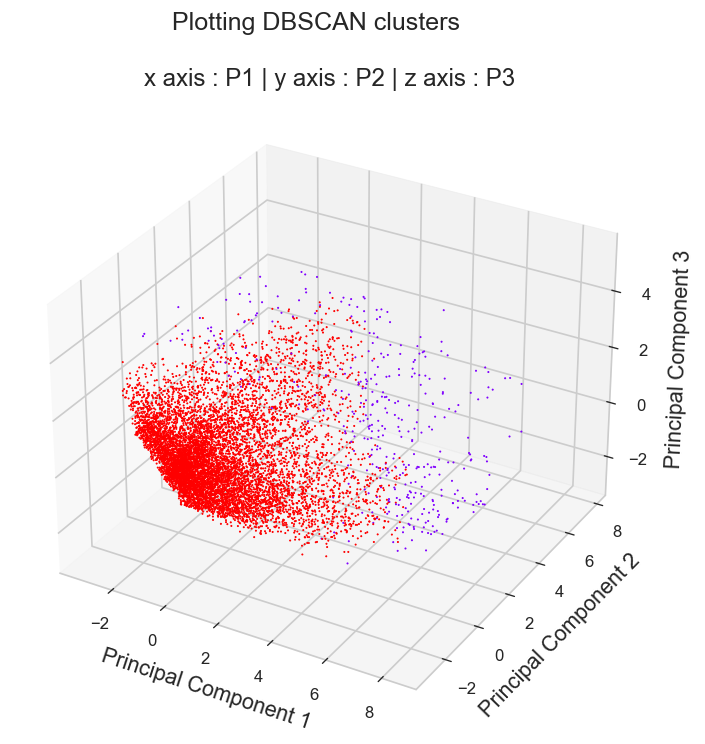

The silhouette score of the DBSCAN solution is: 0.4605504933707346


In [276]:
from sklearn.cluster import DBSCAN
X = pca_df[['PC 1', 'PC 2', 'PC 3']]

# Defining the DBSCAN clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=40)
dbscan_cluster.fit(X)
clusters = X.copy() 
clusters['cluster_pred']= dbscan_cluster.fit_predict(X)

# plot figure of DBSCAN cluster
fig = plt.figure(figsize = (7, 7))
plt.suptitle("Plotting DBSCAN clusters", fontsize = 15)
             
x, s1 = clusters['PC 1'], "Principal Component 1"
y, s2 = clusters['PC 2'], "Principal Component 2"
z, s3 = clusters['PC 3'], "Principal Component 3"

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = clusters['cluster_pred'],cmap='rainbow', s=0.5, alpha = 1)
plt.title('x axis : P1 | y axis : P2 | z axis : P3')
ax.set_xlabel(s1, fontsize = 13)
ax.set_ylabel(s2, fontsize = 13)
ax.set_zlabel(s3, fontsize = 13)

plt.show()

print("The silhouette score of the DBSCAN solution is: {}"
      .format(metrics.silhouette_score(X, clusters.cluster_pred, metric='euclidean')))


#### 9.2.1 Hyperparameter tuning 

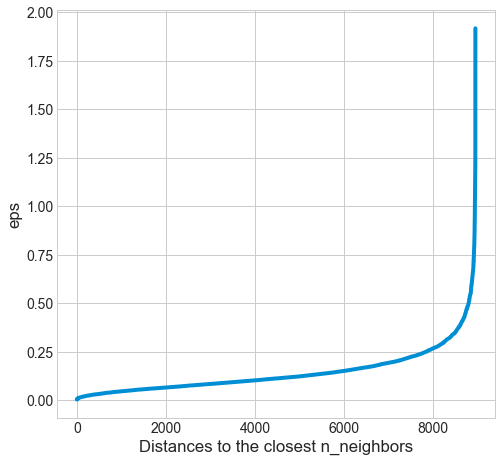

In [124]:
# finding the best eps
from sklearn.neighbors import NearestNeighbors
X = pca_df[['PC 1', 'PC 2', 'PC 3']]

neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)


#plotting the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize = (7, 7))
plt.style.use("seaborn-whitegrid")
plt.plot(distances)
plt.xlabel("Distances to the closest n_neighbors")
plt.ylabel("eps")
plt.show()

The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature

From the figure we can see that eps 0.3 is the best option

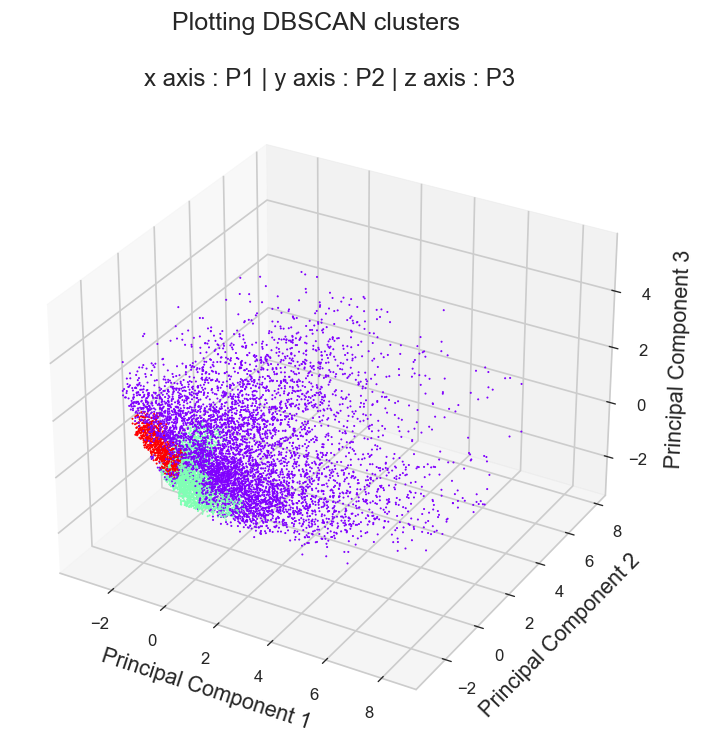

The silhouette score of the DBSCAN solution is: -0.025109714719380085


In [277]:
# Defining the DBSCAN clustering with 0.3 eps
dbscan_cluster = DBSCAN(eps=0.3, min_samples=40)
dbscan_cluster.fit(X)
clusters = X.copy() 
clusters['cluster_pred']= dbscan_cluster.fit_predict(X)

# plot figure of DBSCAN cluster
fig = plt.figure(figsize = (7, 7))
plt.suptitle("Plotting DBSCAN clusters", fontsize = 15)
             
x, s1 = clusters['PC 1'], "Principal Component 1"
y, s2 = clusters['PC 2'], "Principal Component 2"
z, s3 = clusters['PC 3'], "Principal Component 3"

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = clusters['cluster_pred'],cmap='rainbow', s=0.5, alpha = 1)
plt.title('x axis : P1 | y axis : P2 | z axis : P3')
ax.set_xlabel(s1, fontsize = 13)
ax.set_ylabel(s2, fontsize = 13)
ax.set_zlabel(s3, fontsize = 13)

plt.show()

print("The silhouette score of the DBSCAN solution is: {}"
      .format(metrics.silhouette_score(X, clusters.cluster_pred, metric='euclidean')))

In [ ]:
X = pca_df[['PC 1', 'PC 2', 'PC 3']]

kmeans = KMeans(n_clusters=4, random_state=44)
kmeans.fit(X)
clusters = X.copy() 
clusters['cluster_pred'] = kmeans.fit_predict(X)

In [118]:
#Number of clusters in labels

n_clusters = len(set(clusters))
print('Estimated number of clusters: %d' % n_clusters)
print('The silhouette score of the DBSCAN solution: {}'
      .format(metrics.silhouette_score(X, clusters, metric='euclidean')))


Estimated number of clusters: 3
The silhouette score of the DBSCAN solution: -0.025109714719380085


### 9.3 Gaussian mixture clustering models

In [269]:
from sklearn.mixture import GaussianMixture
X = pca_df[['PC 1', 'PC 2', 'PC 3']]

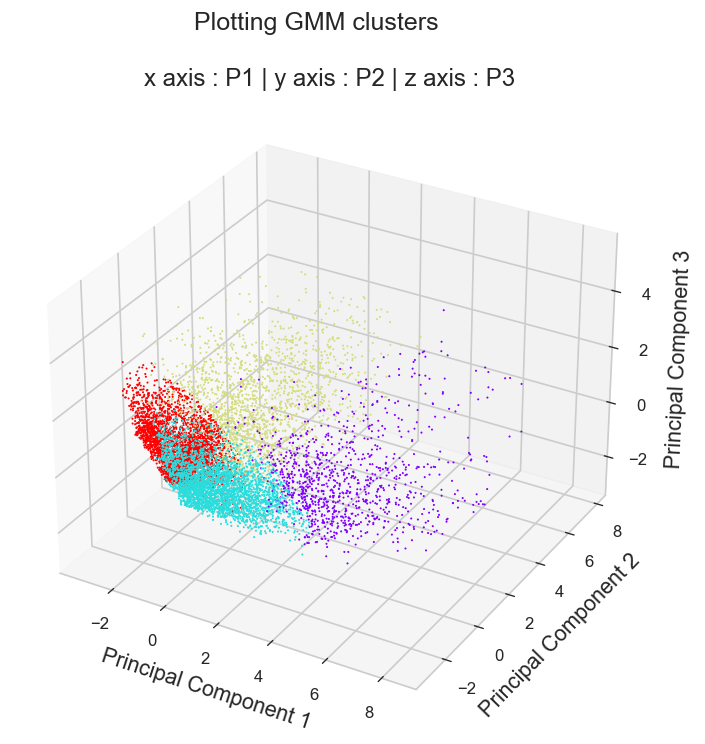

The silhouette score of the GMM solution is: 0.26164252363733714


In [278]:
# Defining the GaussianMixture model
gmm_cluster = GaussianMixture(n_components=4, random_state=44)

# Fit model
gmm_cluster.fit(X)
clusters = X.copy()
clusters['cluster_pred'] = gmm_cluster.fit_predict(X)


# plot figure of GMM cluster
fig = plt.figure(figsize = (7, 7))
plt.suptitle("Plotting GMM clusters", fontsize = 15)
             
x, s1 = clusters['PC 1'], "Principal Component 1"
y, s2 = clusters['PC 2'], "Principal Component 2"
z, s3 = clusters['PC 3'], "Principal Component 3"

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = clusters['cluster_pred'],cmap='rainbow', s=0.5, alpha = 1)
plt.title('x axis : P1 | y axis : P2 | z axis : P3')
ax.set_xlabel(s1, fontsize = 13)
ax.set_ylabel(s2, fontsize = 13)
ax.set_zlabel(s3, fontsize = 13)

plt.show()

print("The silhouette score of the GMM solution is: {}"
      .format(metrics.silhouette_score(X, clusters.cluster_pred, metric='euclidean')))

#### 9.3.1 Hyperparameter tuning

In [273]:
#Tuning GMM
sil_GMM = []

for cluster in range(2,20,1):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type, random_state = 44).fit_predict(X)
        sil_score = metrics.silhouette_score(gmm_df, gmm, metric='euclidean')
        sil_GMM.append((cluster, sil_score, covariance_type))
        
GMM_score = pd.DataFrame(sil_GMM, columns=['cluster', 'sil_score','cov_type'])

In [285]:
# plotting the table

GMM_score.sort_values('sil_score', ascending=False).head(10)

cluster  sil_score   cov_type
1         2   0.341165       tied
5         3   0.308433       tied
7         3   0.284864  spherical
3         2   0.275235  spherical
6         3   0.273113       diag
2         2   0.249684       diag
9         4   0.229382       tied
4         3   0.195885       full
13        5   0.191758       tied
0         2   0.189379       full

The two cluster solution have highest Silhouette score but the clustering is weak to provide better understanding of the customer segmentation. So, I would like to choose at least 3 clusters which have Silhouette score of 0.30

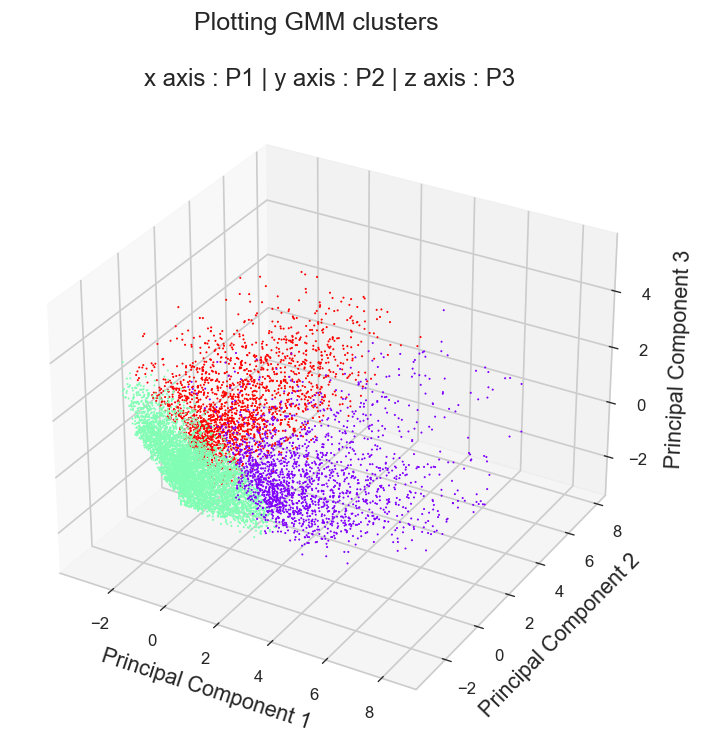

The silhouette score of the GMM solution is: 0.31691287084775155


In [279]:
# Defining the GaussianMixture model with three components
gmm_cluster = GaussianMixture(n_components=3, random_state=44)

# Fit model
gmm_cluster.fit(X)
clusters = X.copy()
clusters['cluster_pred'] = gmm_cluster.fit_predict(X)


# plot figure of GMM cluster
fig = plt.figure(figsize = (7, 7))
plt.suptitle("Plotting GMM clusters", fontsize = 15)
             
x, s1 = clusters['PC 1'], "Principal Component 1"
y, s2 = clusters['PC 2'], "Principal Component 2"
z, s3 = clusters['PC 3'], "Principal Component 3"

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = clusters['cluster_pred'],cmap='rainbow', s=0.5, alpha = 1)
plt.title('x axis : P1 | y axis : P2 | z axis : P3')
ax.set_xlabel(s1, fontsize = 13)
ax.set_ylabel(s2, fontsize = 13)
ax.set_zlabel(s3, fontsize = 13)

plt.show()

print("The silhouette score of the GMM solution is: {}"
      .format(metrics.silhouette_score(X, clusters.cluster_pred, metric='euclidean')))

## 10. Comparing clustering results after dimensionality reduciton

In [282]:
kmeans3_ = KMeans(n_clusters=3, random_state=44).fit_predict(X)
kmeans4_ = KMeans(n_clusters=4, random_state=44).fit_predict(X)
dbscan_= DBSCAN(eps=0.3, min_samples=40).fit_predict(X)
gmm_ = GaussianMixture(n_components=3, covariance_type='tied', random_state=44).fit_predict(X)

kmeans_3Silhouette_Score = metrics.silhouette_score(X, kmeans3_, metric='euclidean')
kmeans_4Silhouette_Score = metrics.silhouette_score(X, kmeans4_, metric='euclidean')
DBSCAN_Silhouette_Score = metrics.silhouette_score(X, dbscan_, metric='euclidean')
GMM_Silhouette_Score = metrics.silhouette_score(X, gmm_, metric='euclidean')


All_clustering_Scores  = [ ['KMeans3',kmeans_3Silhouette_Score ],['KMeans4',kmeans_4Silhouette_Score ], ['GMM', GMM_Silhouette_Score],['DBSCAN', DBSCAN_Silhouette_Score]]

All_clustering_Scores  = pd.DataFrame(All_clustering_Scores, columns=['Clustering Method', 'Silhouette Score']) 
All_clustering_Scores.sort_values(by='Silhouette Score', ascending= False)

Clustering Method  Silhouette Score
2               GMM          0.417832
0           KMeans3          0.393922
1           KMeans4          0.304093
3            DBSCAN         -0.025110

In [288]:
# plotting K-Means with 4 clustering


fig = px.scatter_3d(pca_df, x=pca_df['PC 1'], y= pca_df['PC 2'], z= pca_df['PC 3'], 
                    color= KMeans(n_clusters=4, random_state=44).fit_predict(X)) 

fig.show()

## 11. Understanding clusters and final conclusions

In [303]:
# finally I have chosen K-Means with 4 clusters.
plotting_df = credit_df1.copy()
kmeans4_ = KMeans(n_clusters=4, random_state=44).fit(plotting_df) 
plotting_df['cluster'] = kmeans4_.labels_


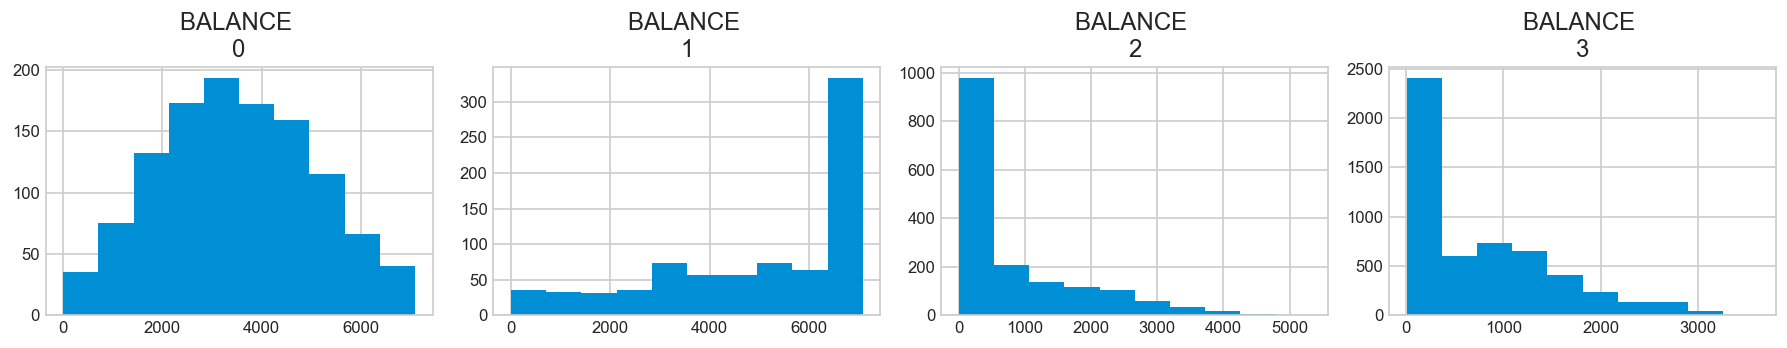

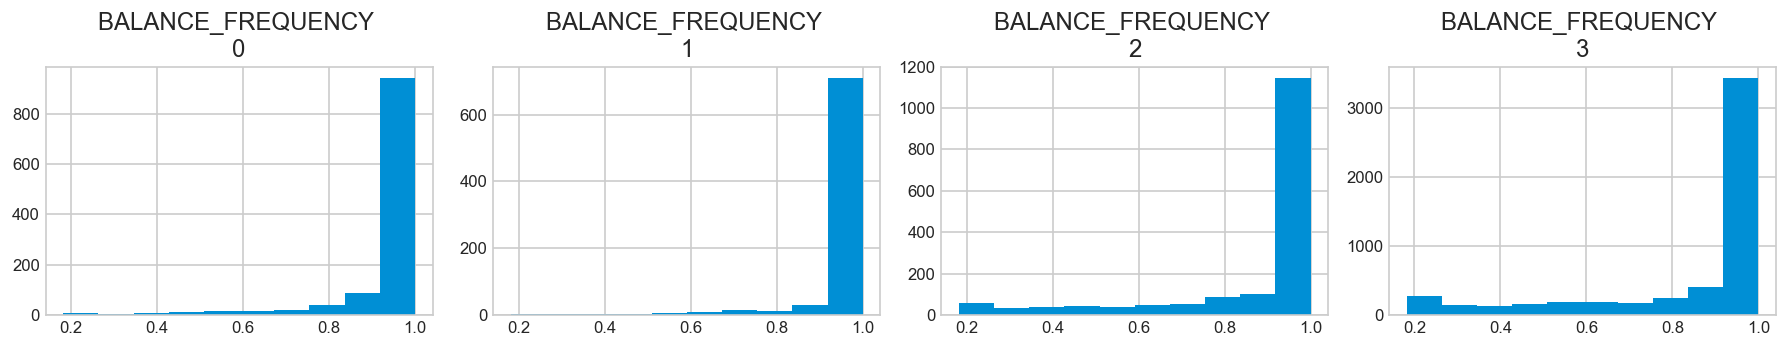

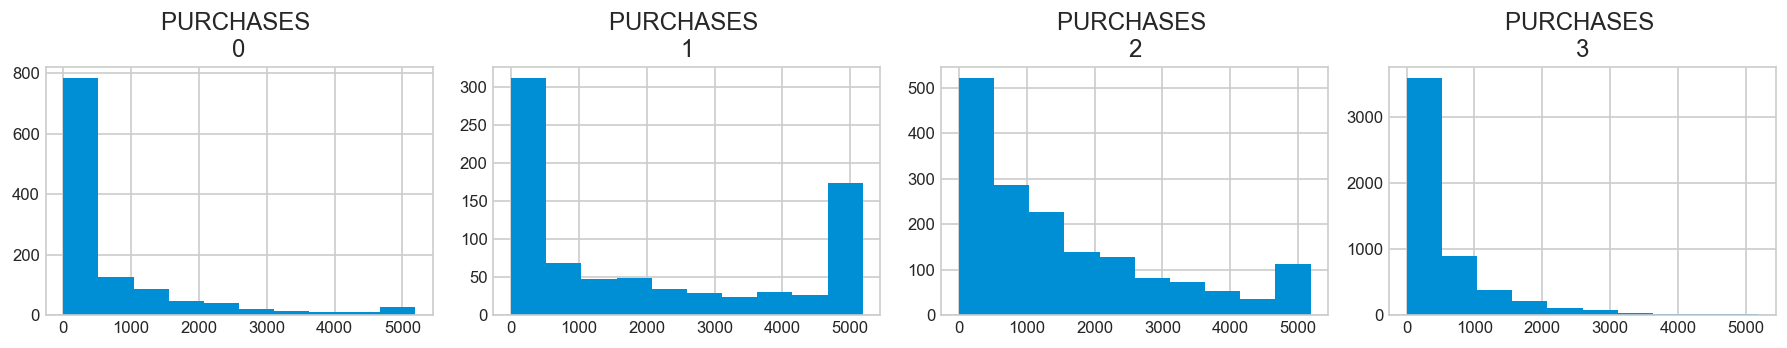

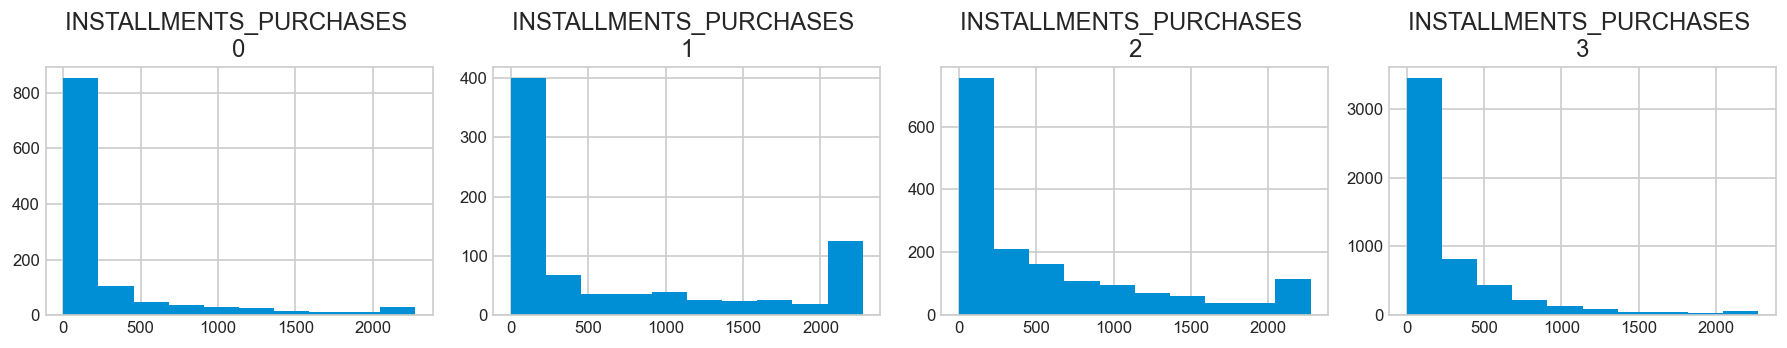

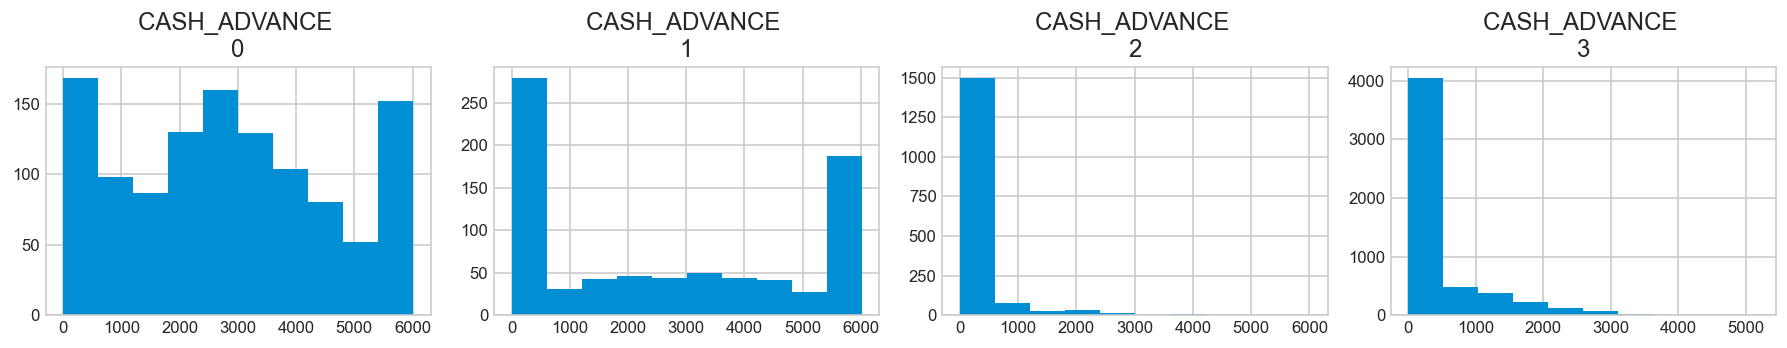

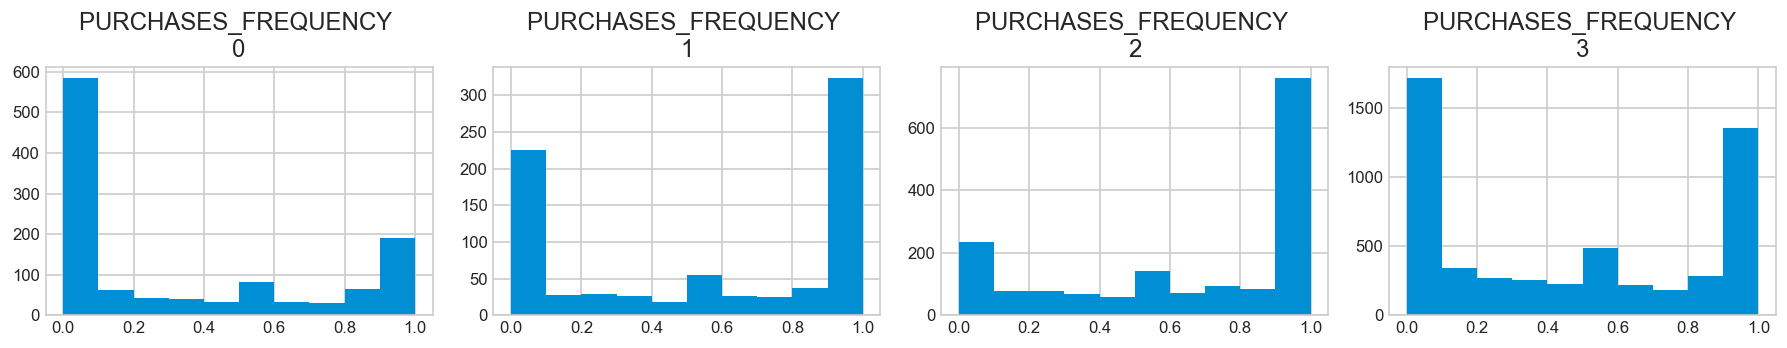

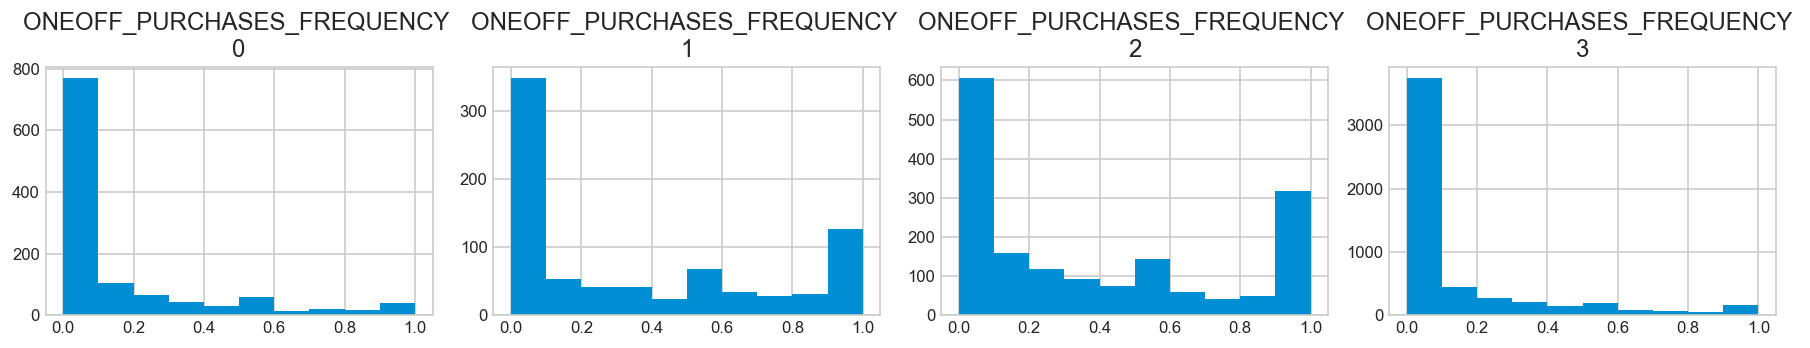

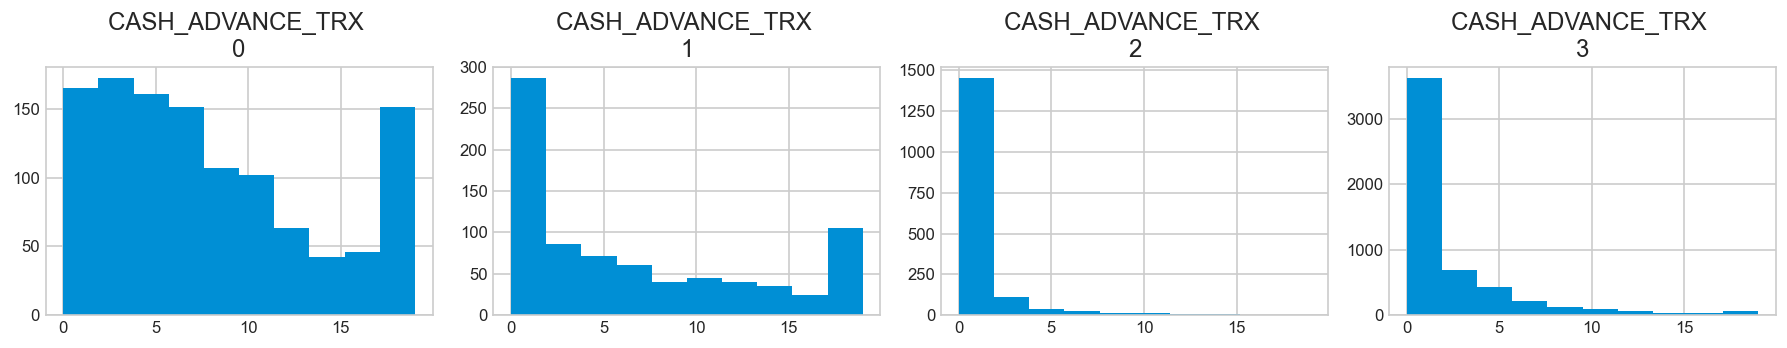

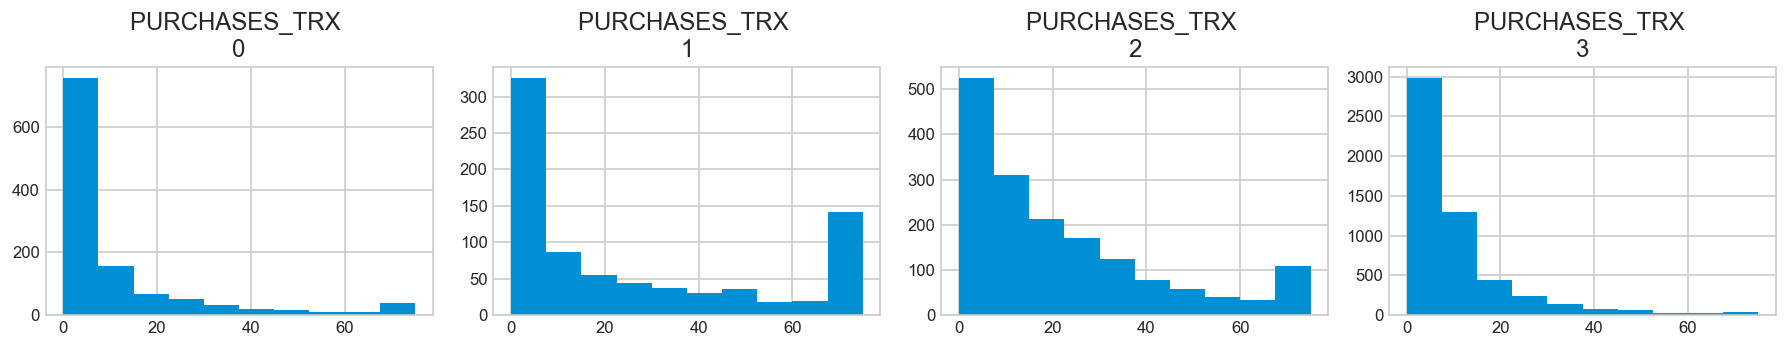

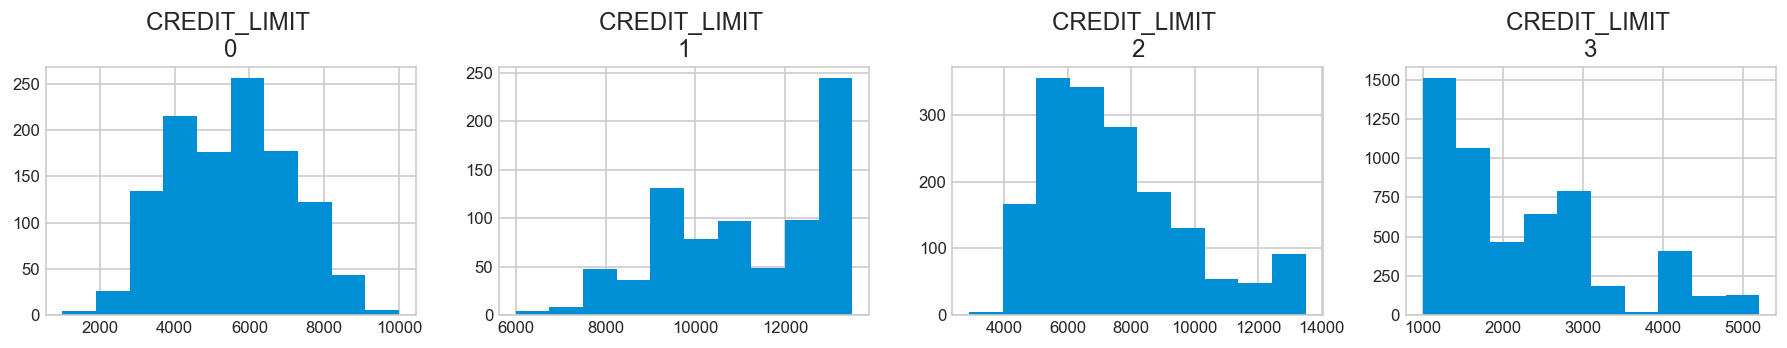

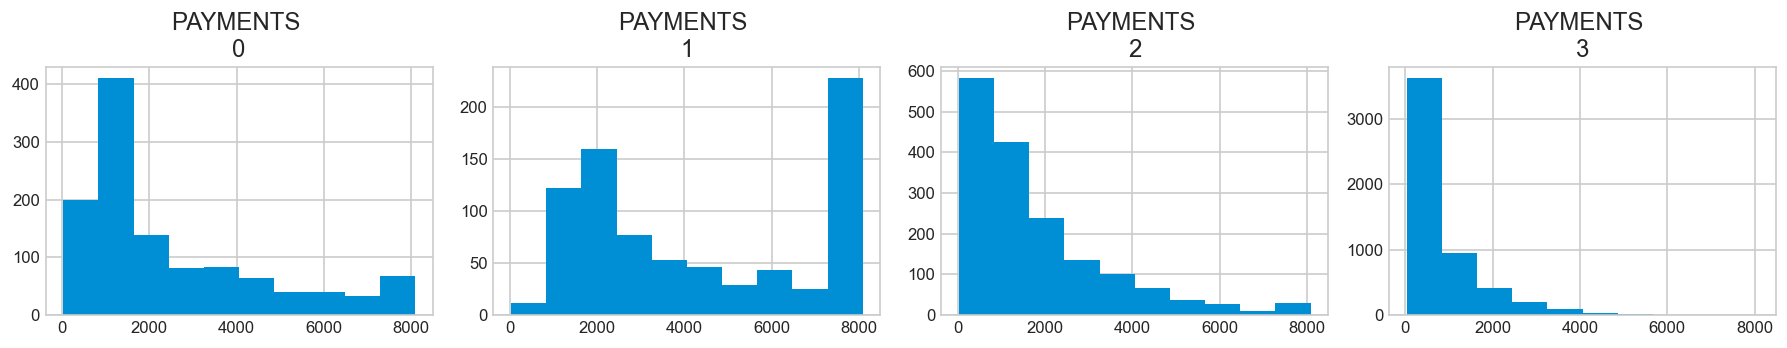

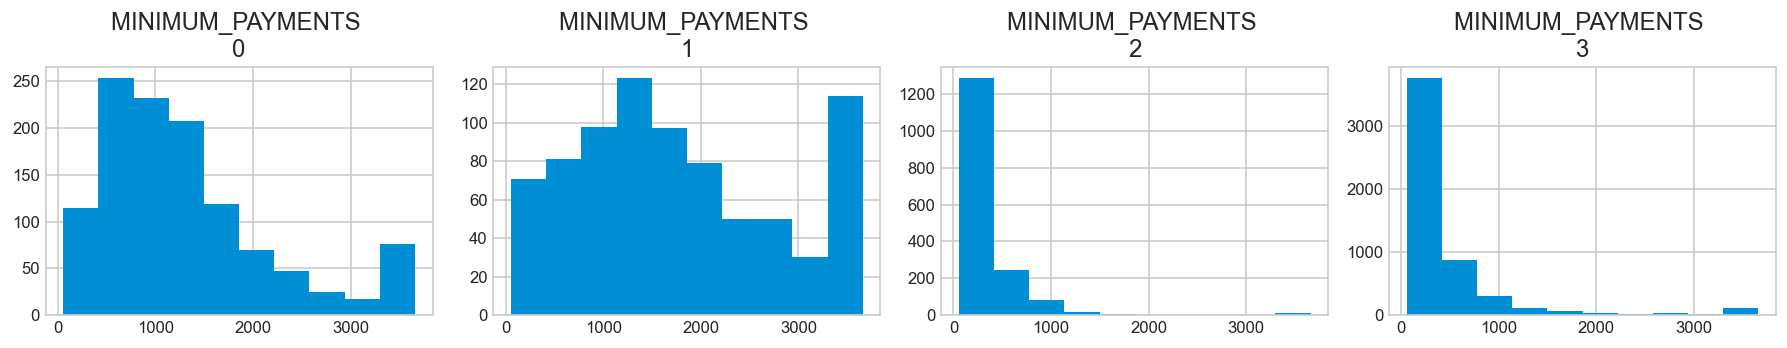

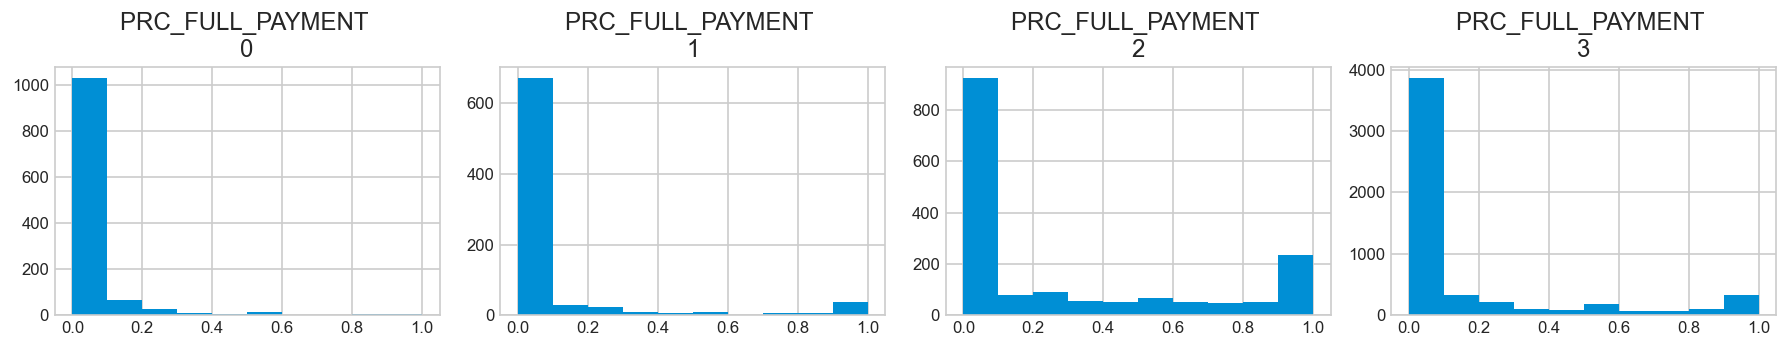

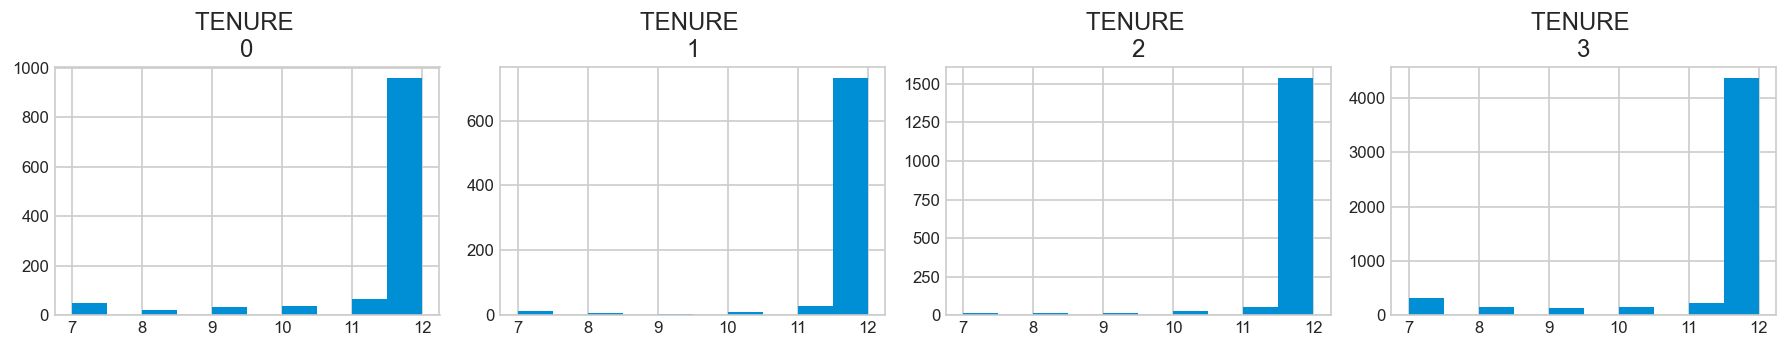

In [309]:
# plotting histograms of clusters
for column in credit_df1.columns:
    plt.figure(figsize=(15,3))
    for i in range(0,4):
        plt.subplot(1,4,i+1)
        cluster = plotting_df[plotting_df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

**Understanding clusters**

**Cluster 0:** This customer group indicates a small group of customers whose payements are less than 4000 USD. Their cash in advance transaction is also highly spreaded. 

**Cluster 1:** This cluster group have wide spread minimum payments, highest payments done by user and  they have highest credit limits among other groups.

**Cluster 2:** Most of this group's member have less than 1000 cash advance.

**Cluster 3:** Highest user are with credit limits range 1000-2000$ This group also poses highest cash advance given and highest installment purchases made.Similarly,least purchase frequency is highest among other gorups.


## 12. References

https://www.usatoday.com/story/money/2020/02/26/american-families-forced-to-rely-on-credit-cards/111364698/

https://www.cnbc.com/select/lowest-credit-card-balances-in-8-years/
